In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('wine_dataset.csv')

In [ ]:
data.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

In [ ]:
data.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

####No null values in our dataset

In [ ]:
np.isinf(data).values.sum()

np.int64(0)

####There are no infinite values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

####All the variables are of float type except Magnessium and Prolinne which are integers.

In [ ]:
data.shape

(178, 13)

In [ ]:
data.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [ ]:
data.duplicated().sum()

np.int64(0)

####No duplicate values in our data.

##Univariate EDA

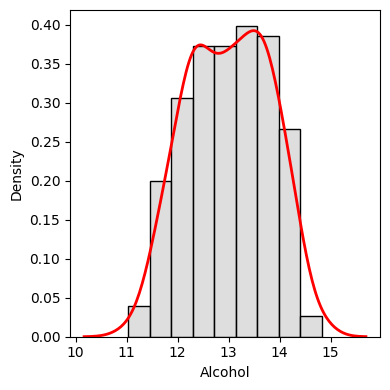

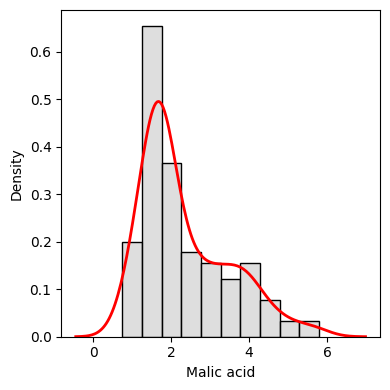

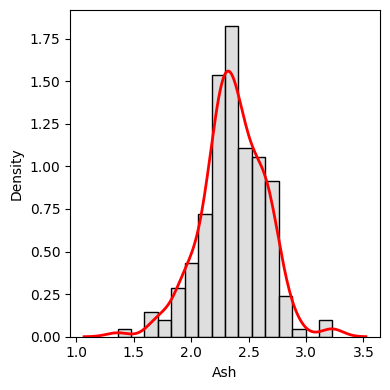

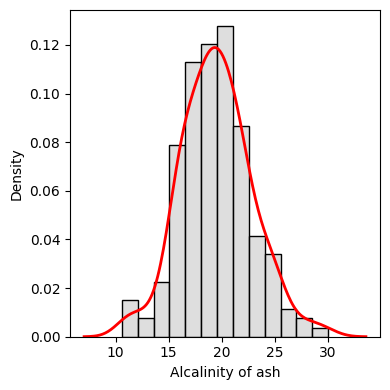

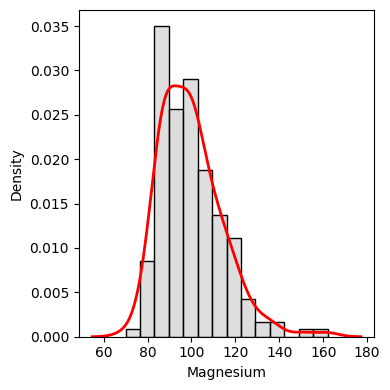

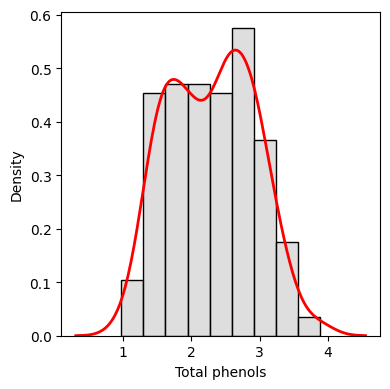

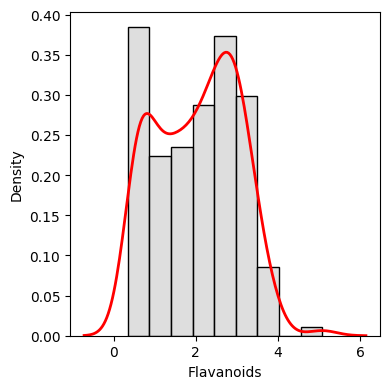

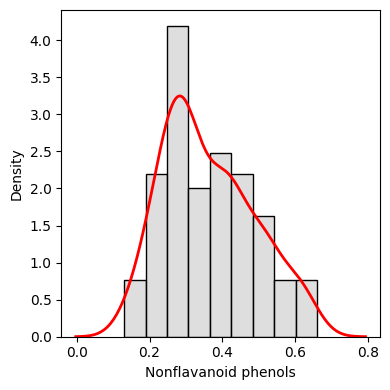

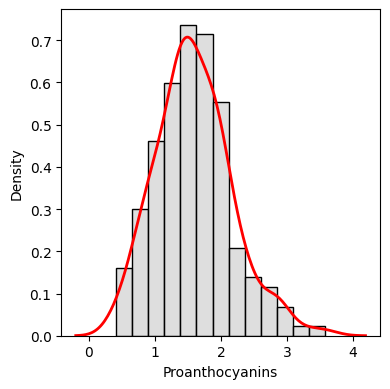

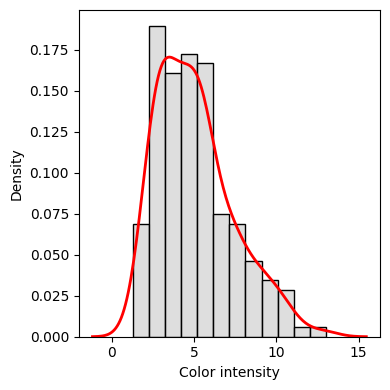

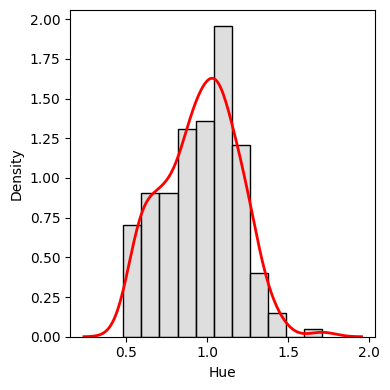

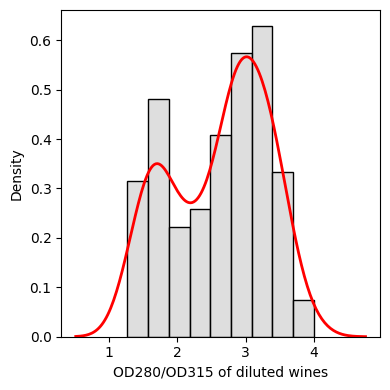

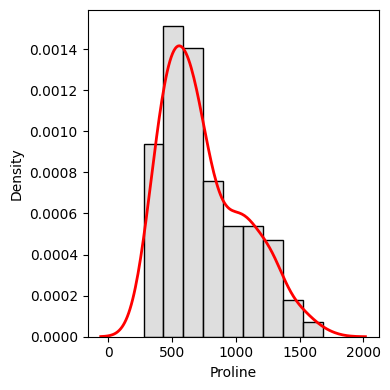

In [ ]:
for var in data.columns:
  plt.figure(figsize=(4, 4))
  sns.histplot(data[var] , stat = 'density' , color = 'lightgray' , edgecolor = 'black')
  sns.kdeplot(data[var], color='red', linewidth=2)
  plt.tight_layout()
  plt.show()


In [ ]:
data.skew()

Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

#####The skewness values show that most Wine dataset features are roughly symmetric, but a few (like Malic acid, Magnesium, Color intensity, and Proline) are positively skewed, and a couple (like OD280/OD315 and Ash) are slightly negatively skewed.

In [ ]:
r_names = ['column name', 'test statistic' , 'p-value']
z = data.columns
d = {}
for i in range(0,13):
  d[i] = [z[i] , stats.shapiro(data[z[i]])[0] , stats.shapiro(data[z[i]])[1]]
d
norm_test=pd.DataFrame(d,index=r_names)
norm_test


0           1         2                  3          4   \
column name      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium   
test statistic  0.981804    0.888784  0.983947           0.990225   0.938331   
p-value         0.020048         0.0  0.038683           0.263869   0.000001   

                           5           6                     7   \
column name     Total phenols  Flavanoids  Nonflavanoid phenols   
test statistic       0.976682    0.954526              0.962522   
p-value              0.004395    0.000017              0.000106   

                             8                9         10  \
column name     Proanthocyanins  Color intensity       Hue   
test statistic         0.980723         0.940318  0.981342   
p-value                0.014454         0.000001  0.017425   

                                          11        12  
column name     OD280/OD315 of diluted wines   Proline  
test statistic                      0.945047  0.931186  
p-value                             0.000002       0.0

#####Only "Alcalinity of ash" has a p-value above 0.05 (≈0.263869), meaning it may follow a normal distribution.
#####All other features have p-values well below 0.05 — meaning they do not follow a normal distribution.Thus,Most features in the Wine dataset are not normally distributed, except Alcalinity of ash.

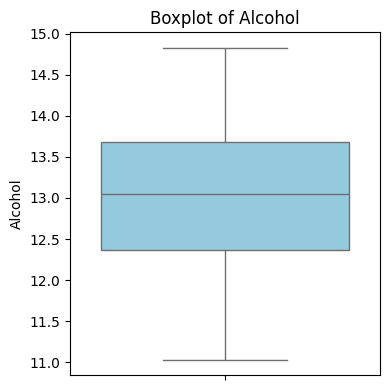

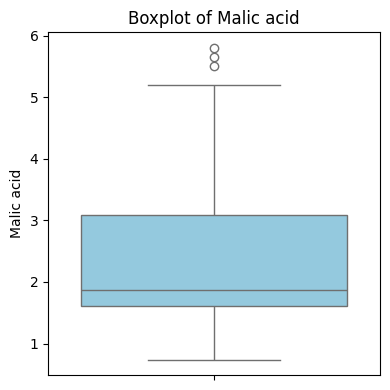

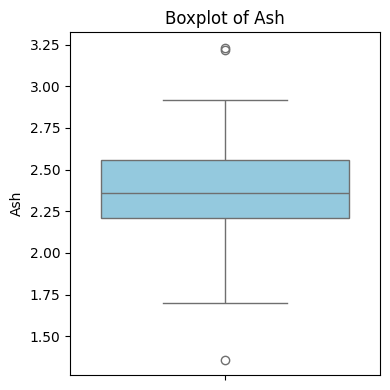

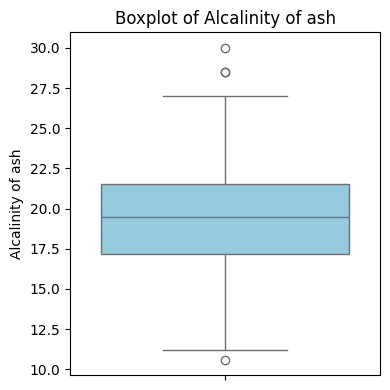

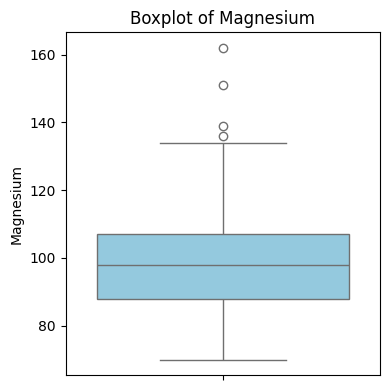

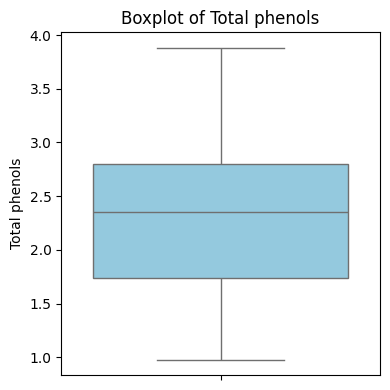

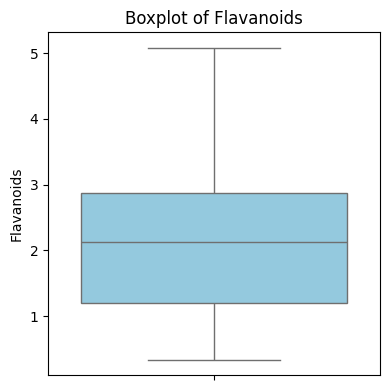

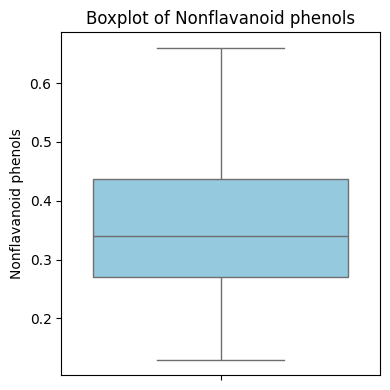

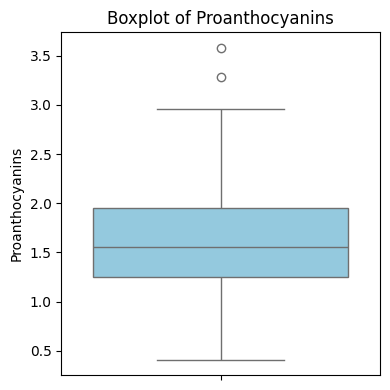

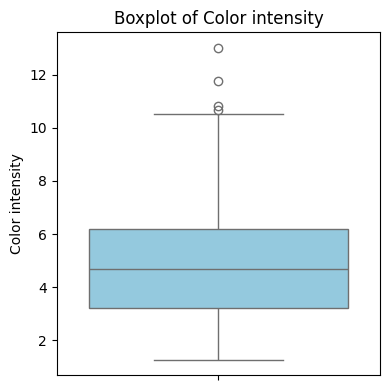

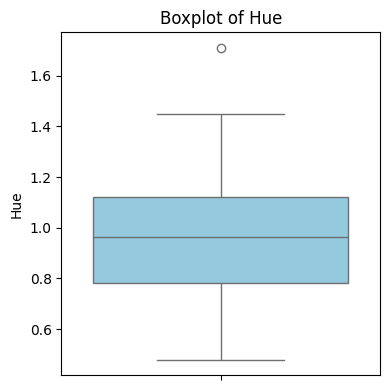

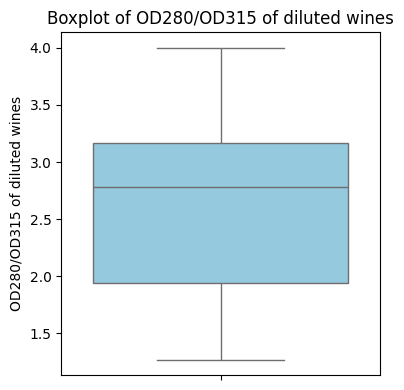

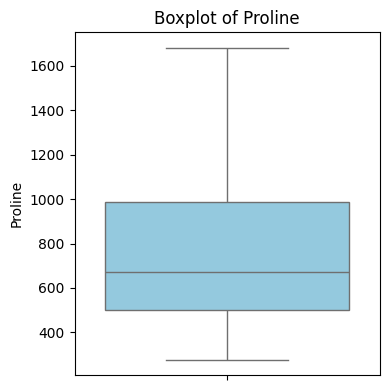

In [ ]:
for var in data.columns:
  plt.figure(figsize=(4, 4))
  sns.boxplot(y = data[var] , color = 'skyblue')
  plt.title(f'Boxplot of {var}')
  plt.ylabel(var)

  plt.tight_layout()
  plt.show()

#####The boxplots show a few mild outliers in certain features( Malic acid, Ash, Alcalinity of Ash,Magnesium, Proanthocyanins,Color intensity, Hue), mostly on the higher side.These outliers are not extreme and unlikely to heavily impact the results, so we can proceed with the analysis.

###Multivariate EDA

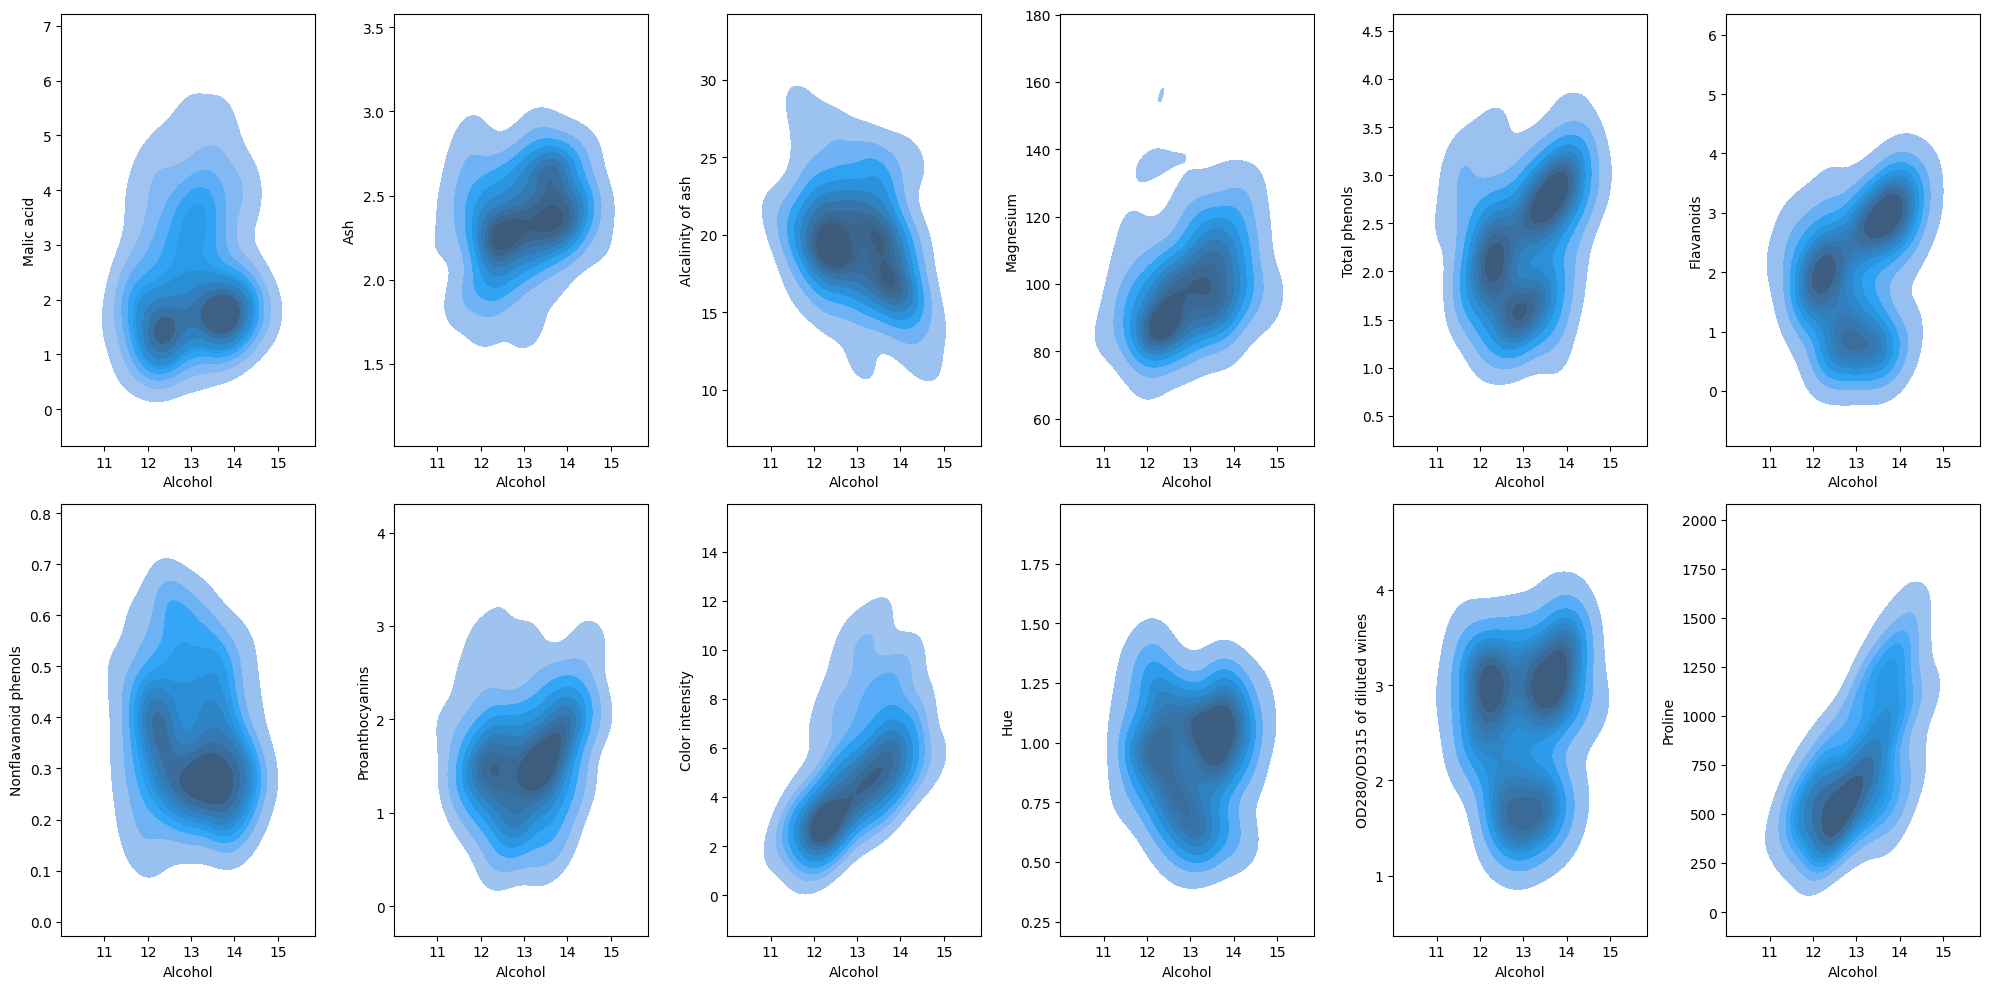

In [ ]:
#Alcohol
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Alcohol"],y=data[col[index+1]],ax=ax[i][j],fill=True)
        index=index+1
plt.tight_layout()
plt.show()

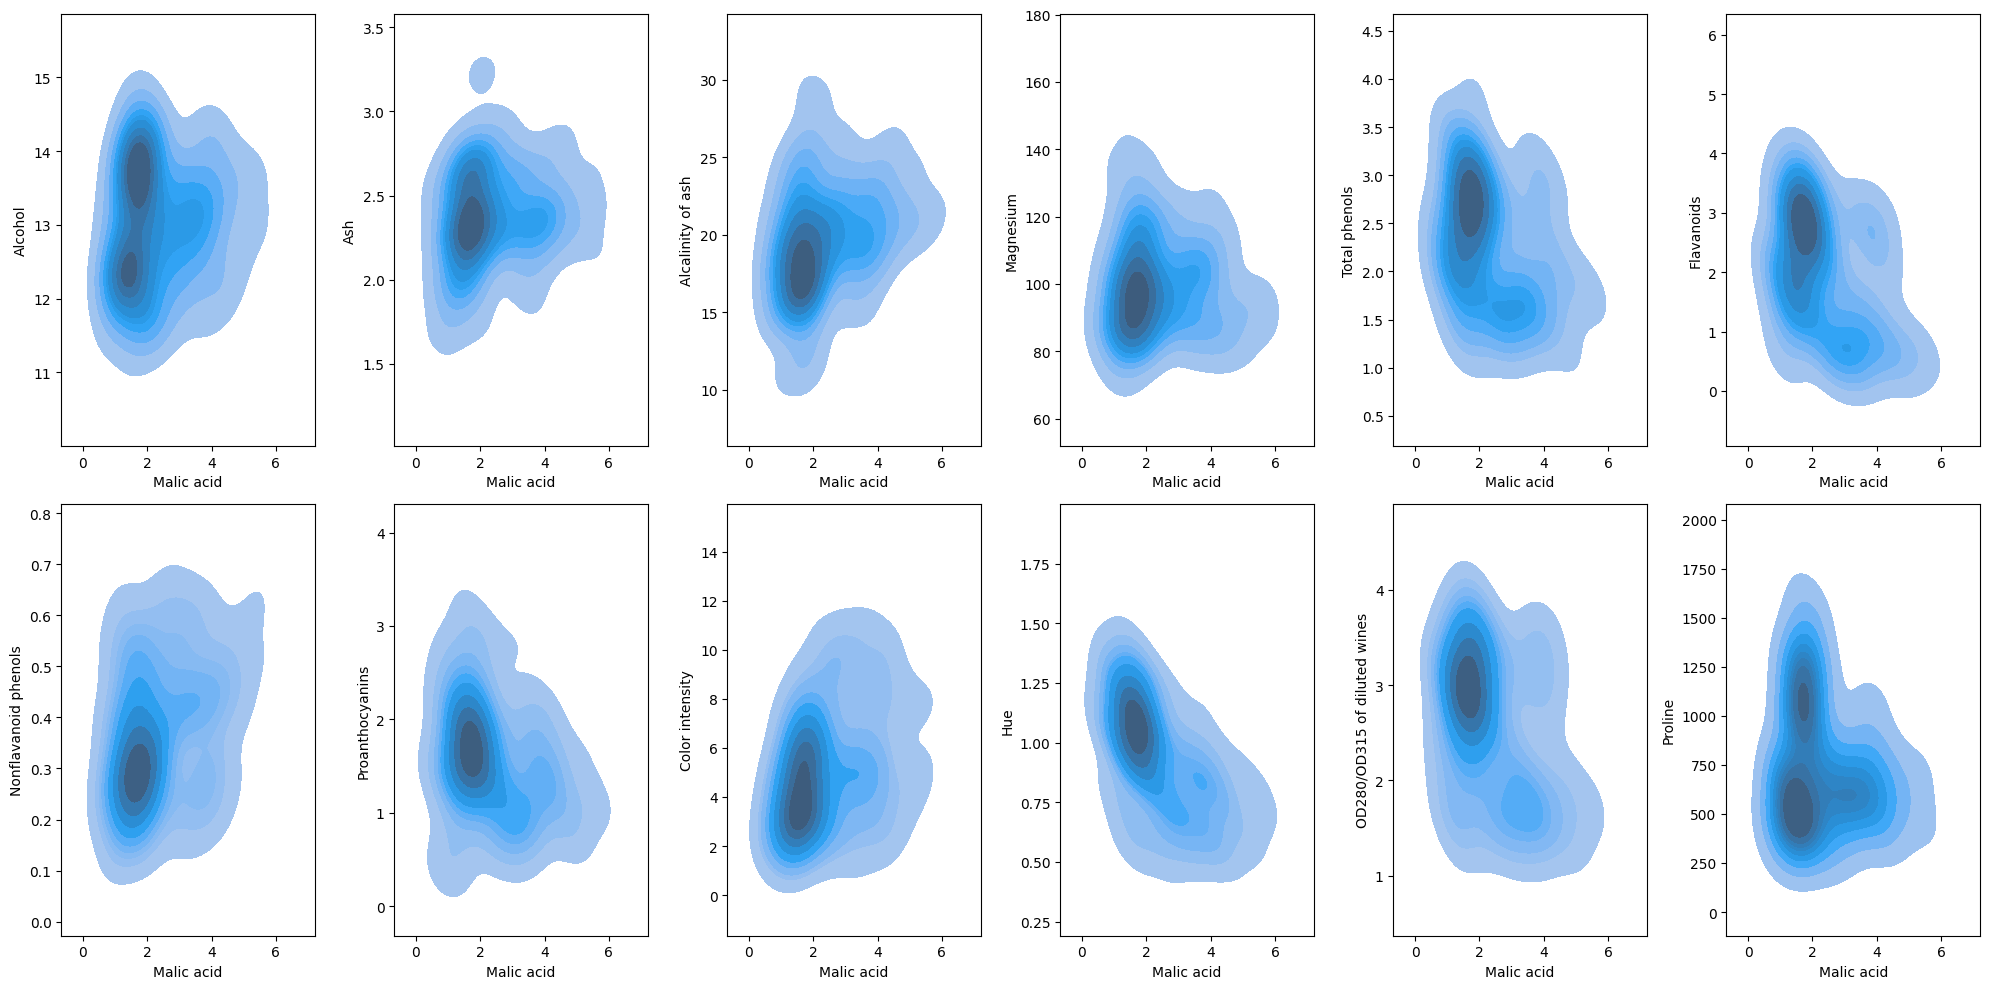

In [ ]:
#Malic acid
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Malic acid"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==1):
          index+=1
plt.tight_layout()
plt.show()

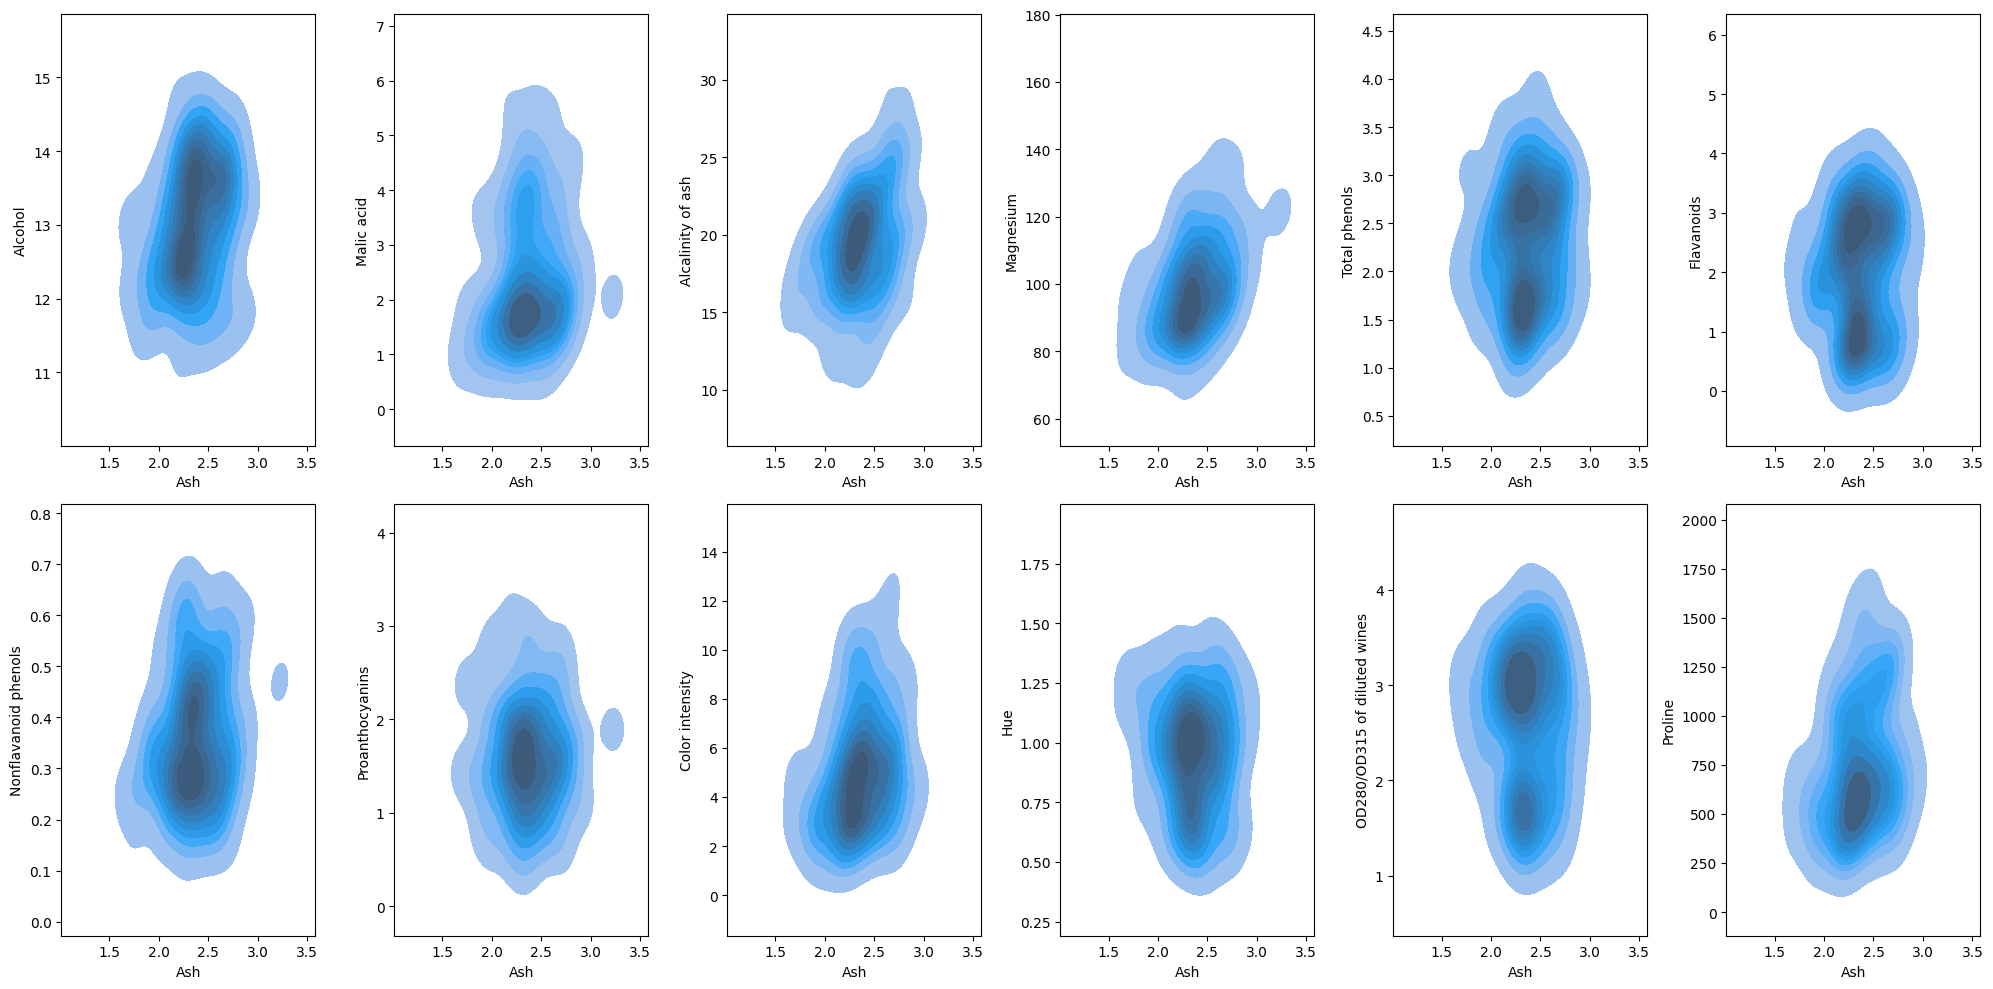

In [ ]:
#Ash
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Ash"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==2):
          index+=1
plt.tight_layout()
plt.show()

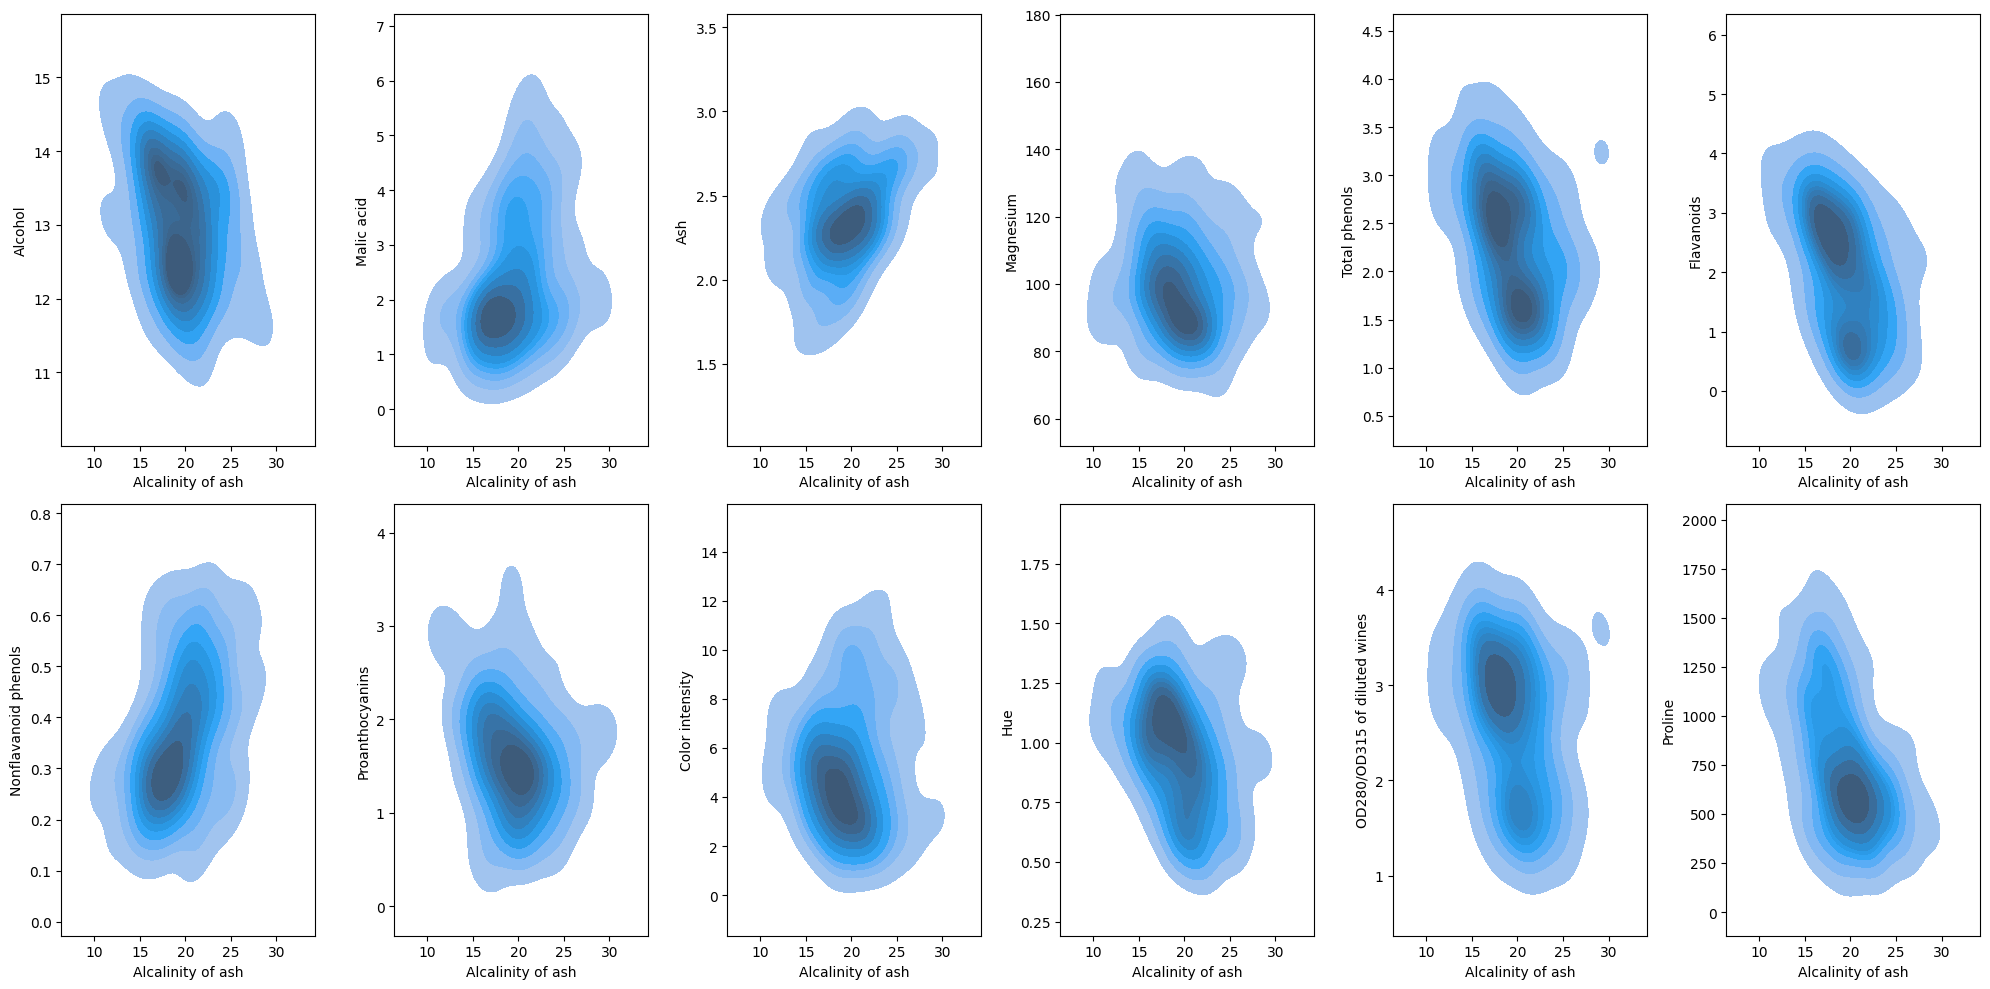

In [ ]:
#Alcalinity of ash
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Alcalinity of ash"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==3):
          index+=1
plt.tight_layout()
plt.show()

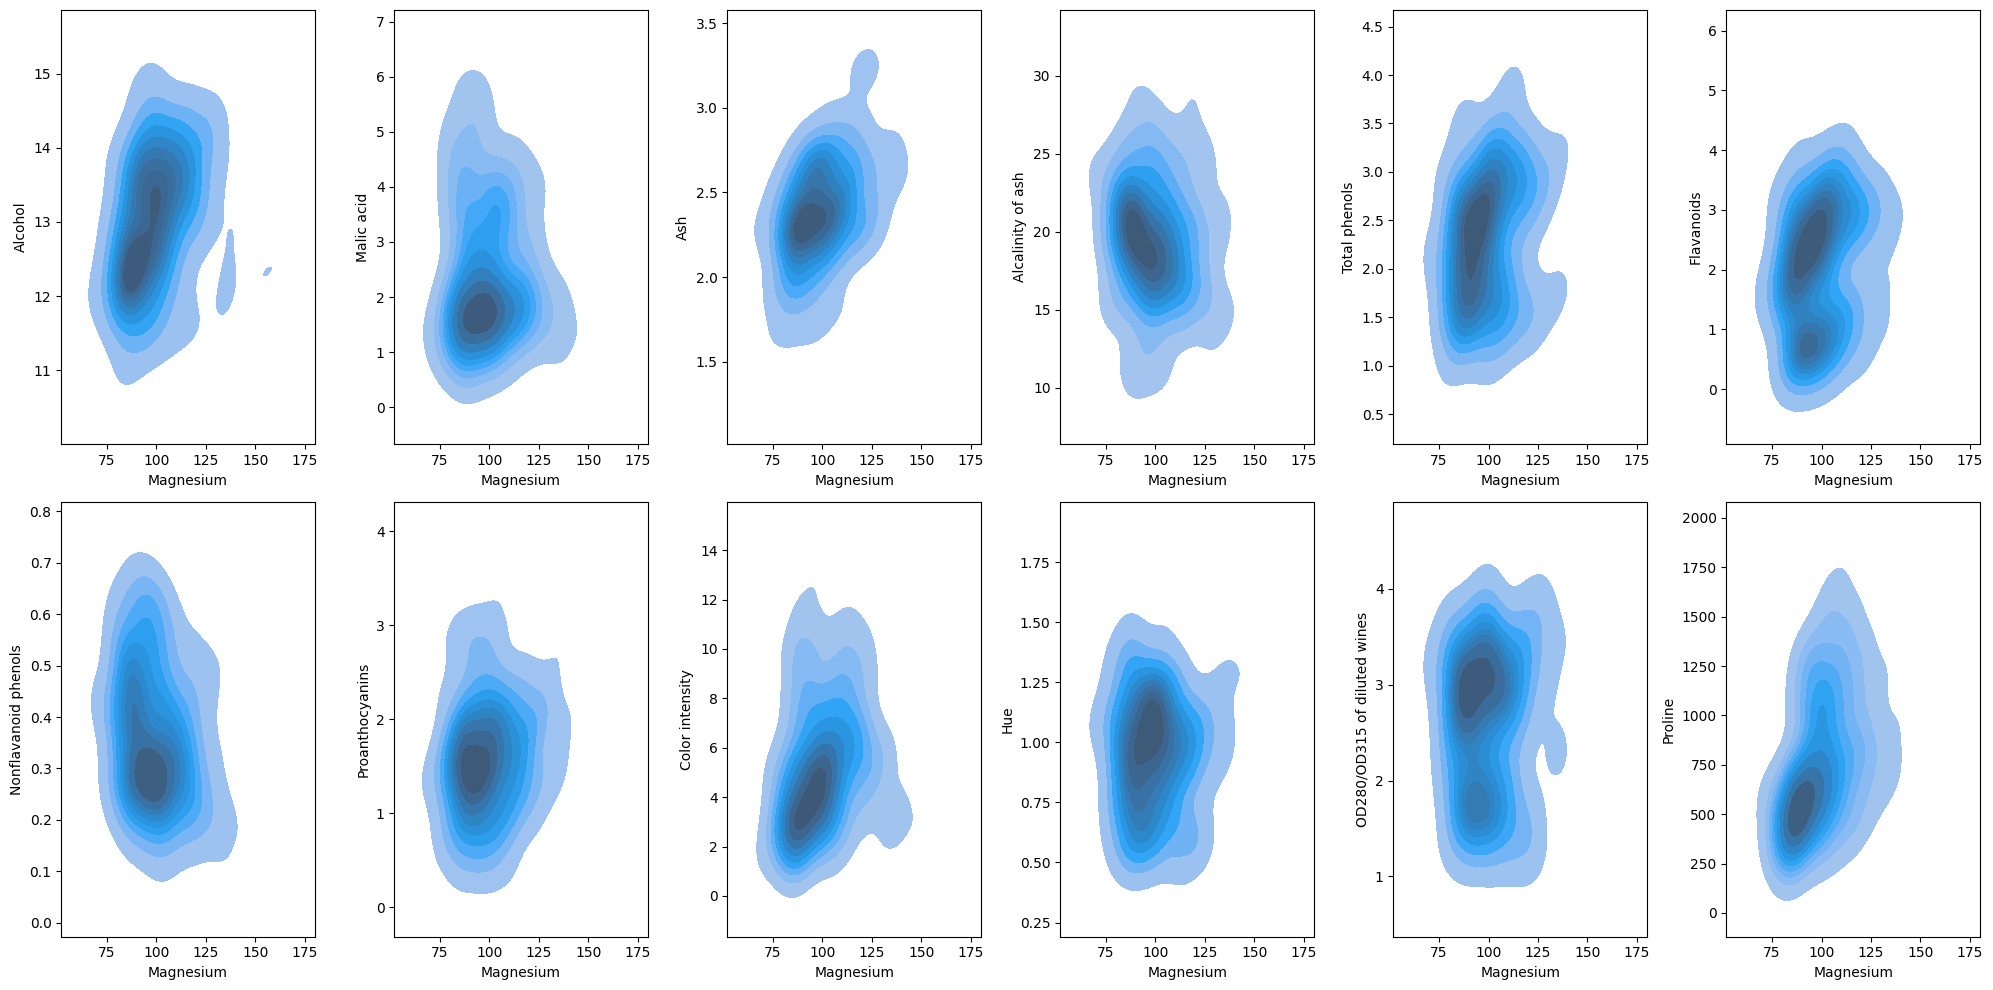

In [ ]:
#Magnesium
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Magnesium"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==4):
          index+=1
plt.tight_layout()
plt.show()

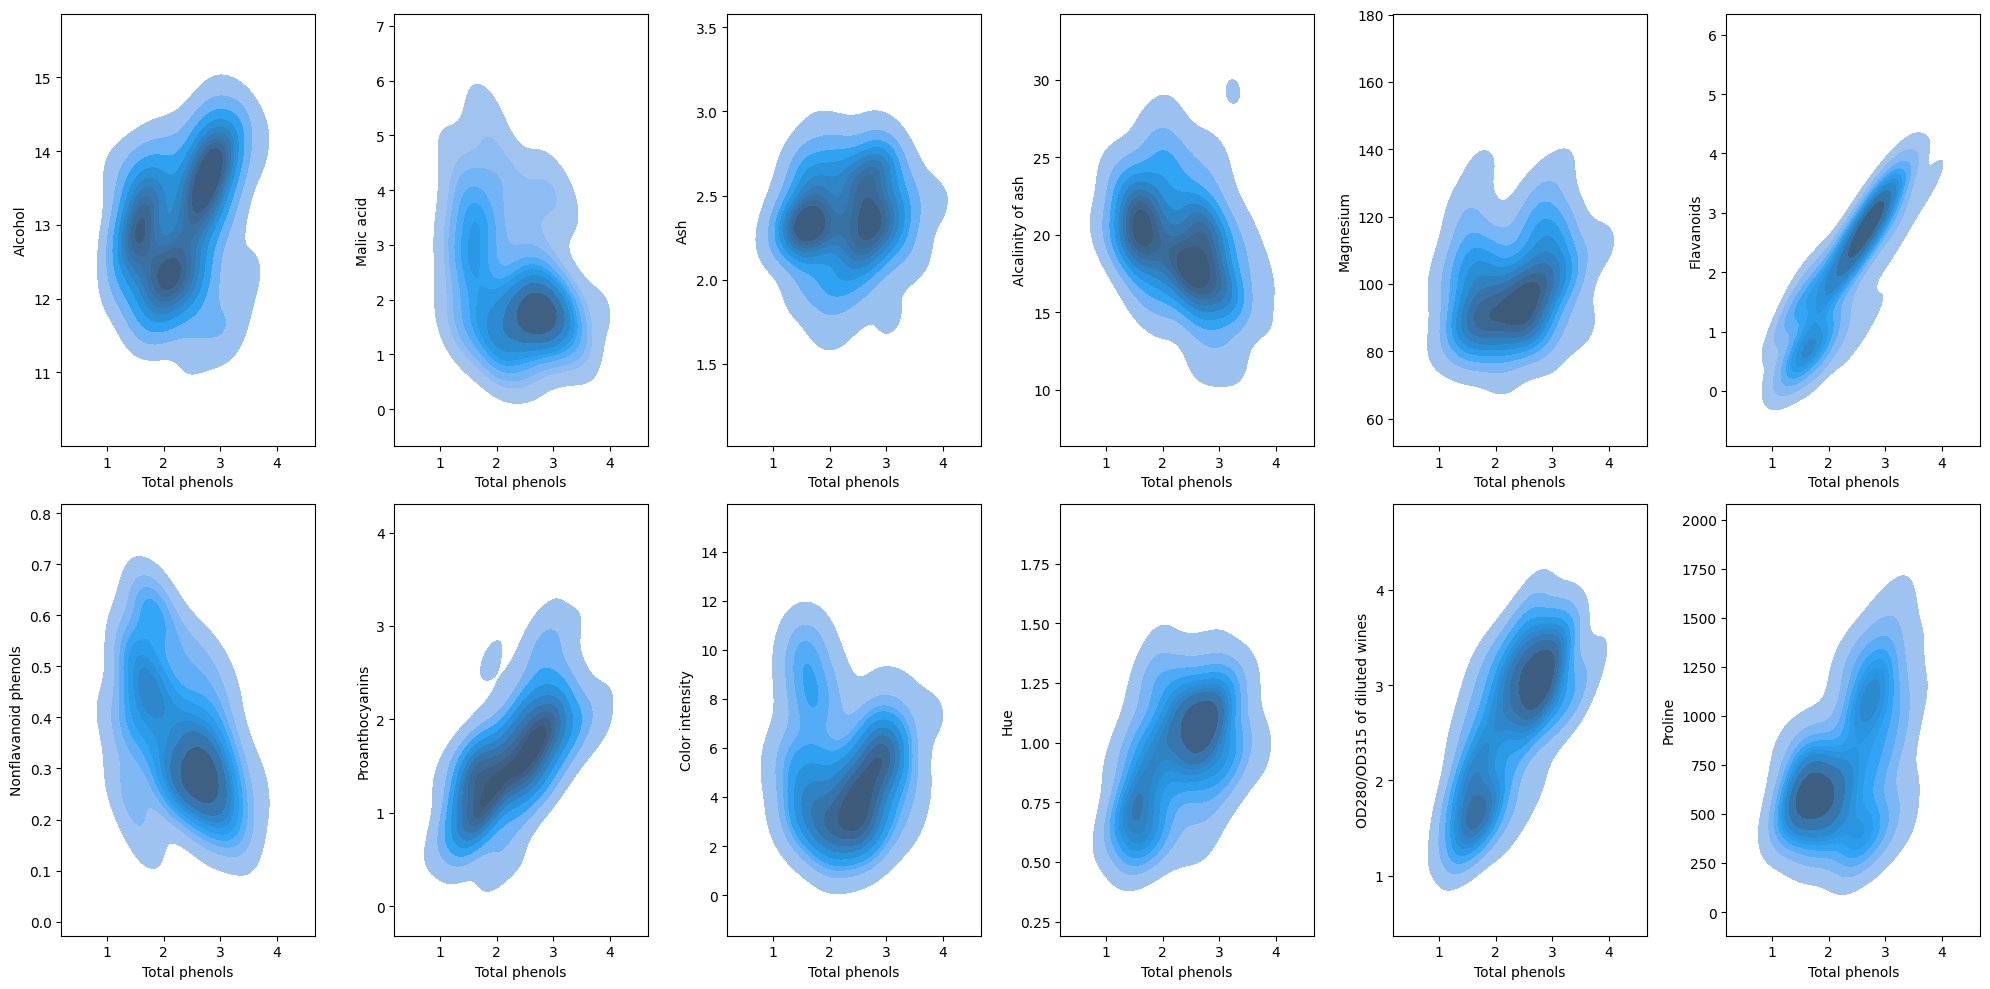

In [ ]:
#Total Phenols
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Total phenols"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==5):
          index+=1
plt.tight_layout()
plt.show()

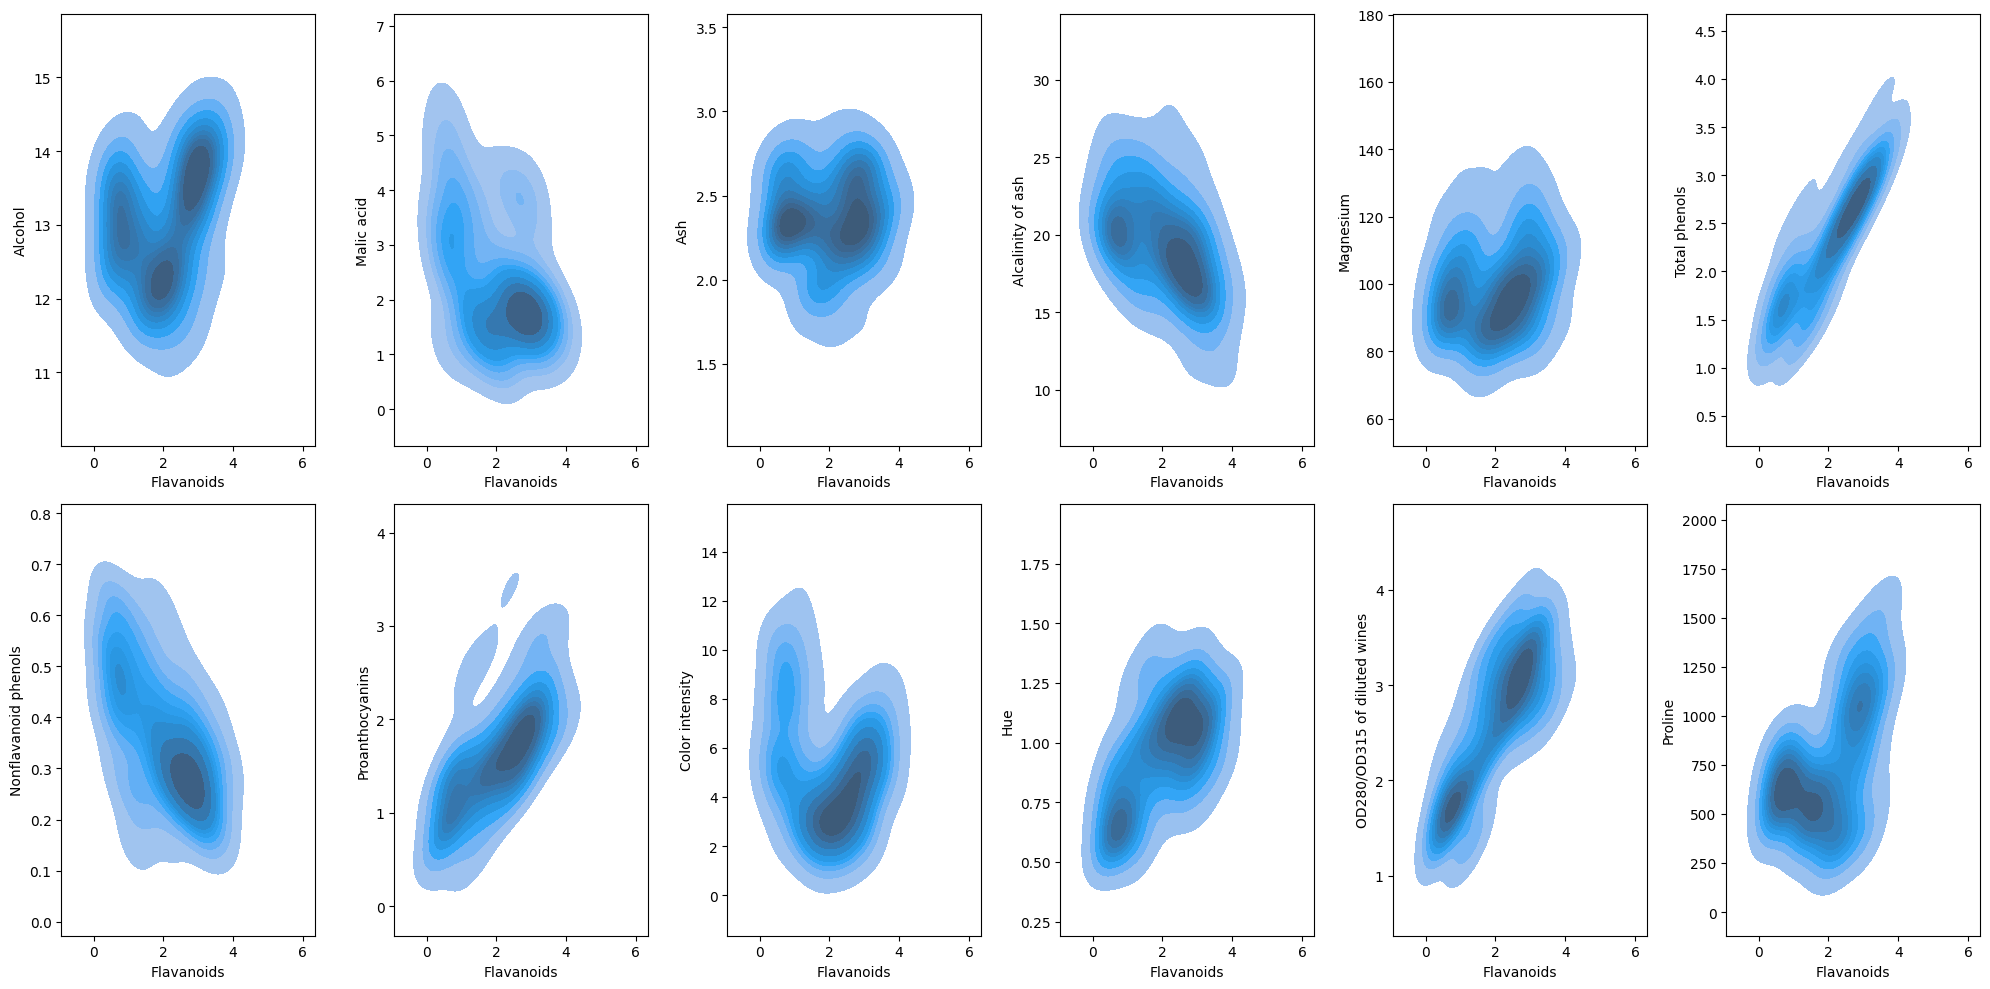

In [ ]:
#Flavanoids
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Flavanoids"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==6):
          index+=1
plt.tight_layout()
plt.show()

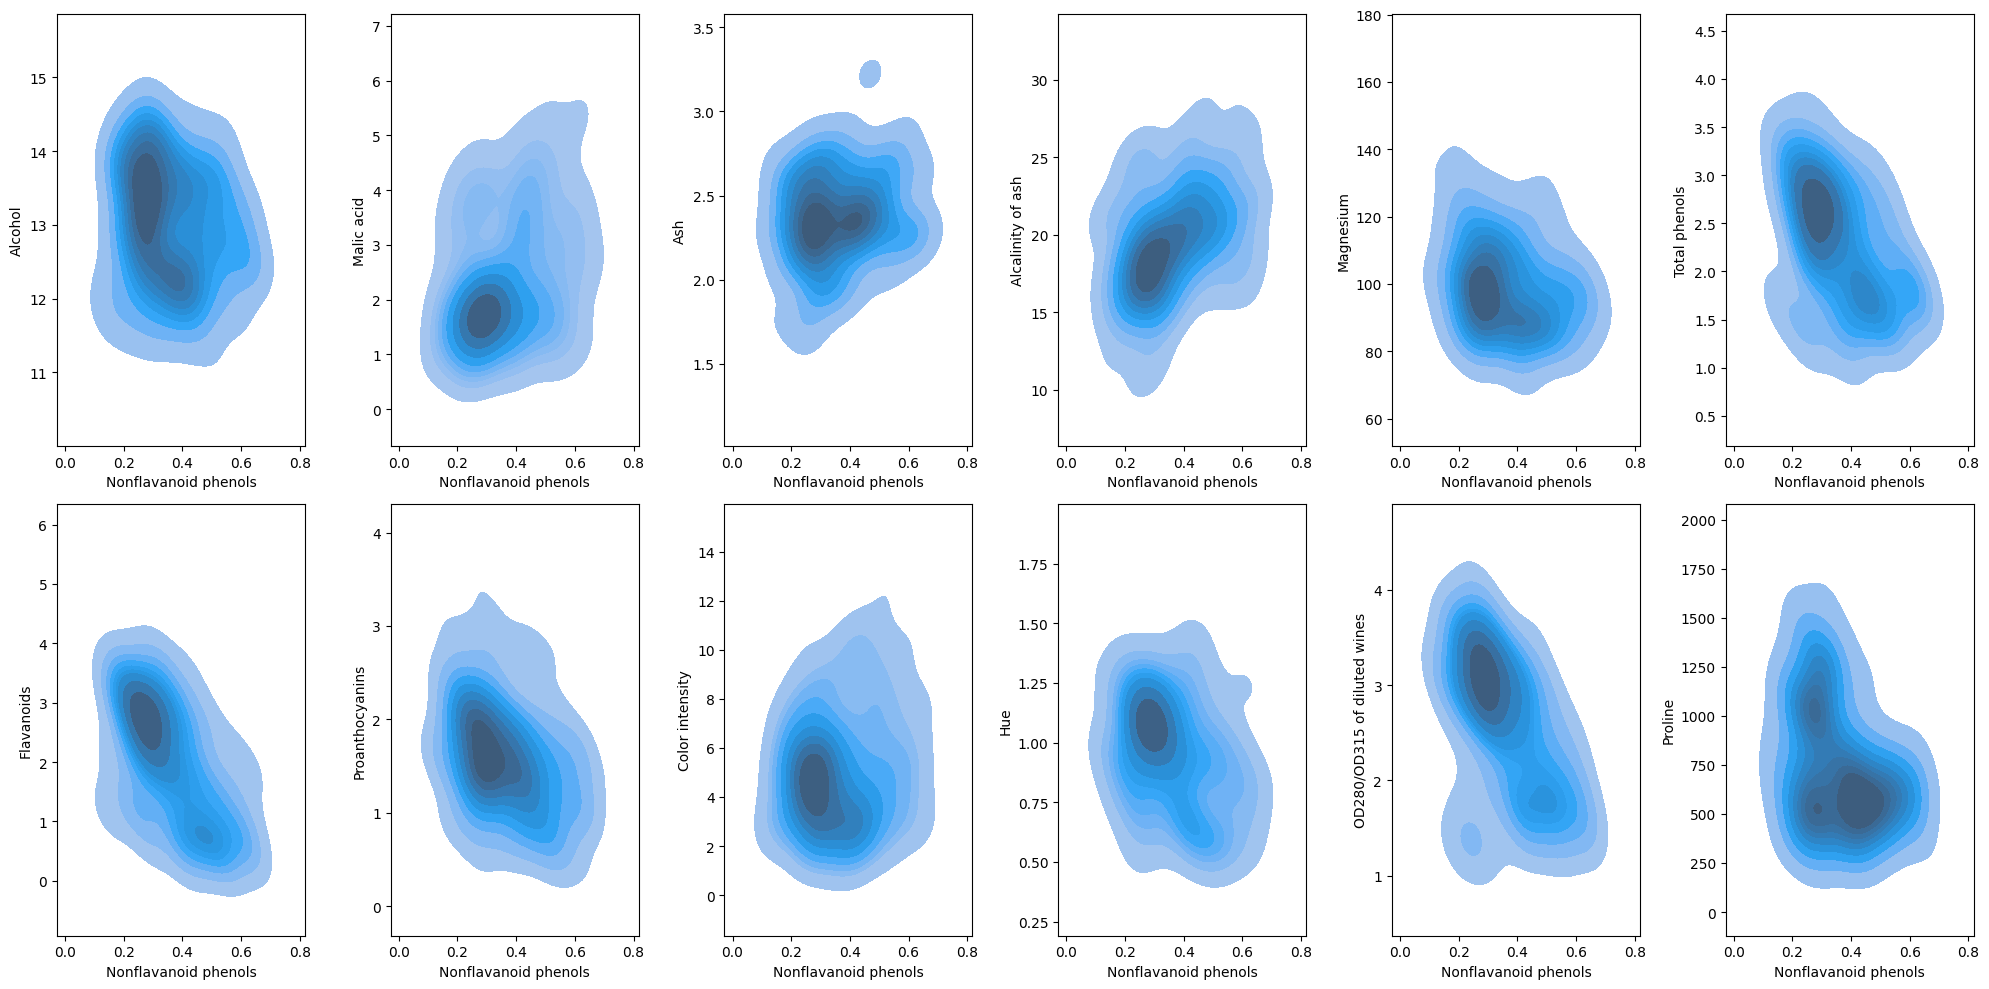

In [ ]:
#Nonflavanoid phenols
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Nonflavanoid phenols"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==7):
          index+=1
plt.tight_layout()
plt.show()

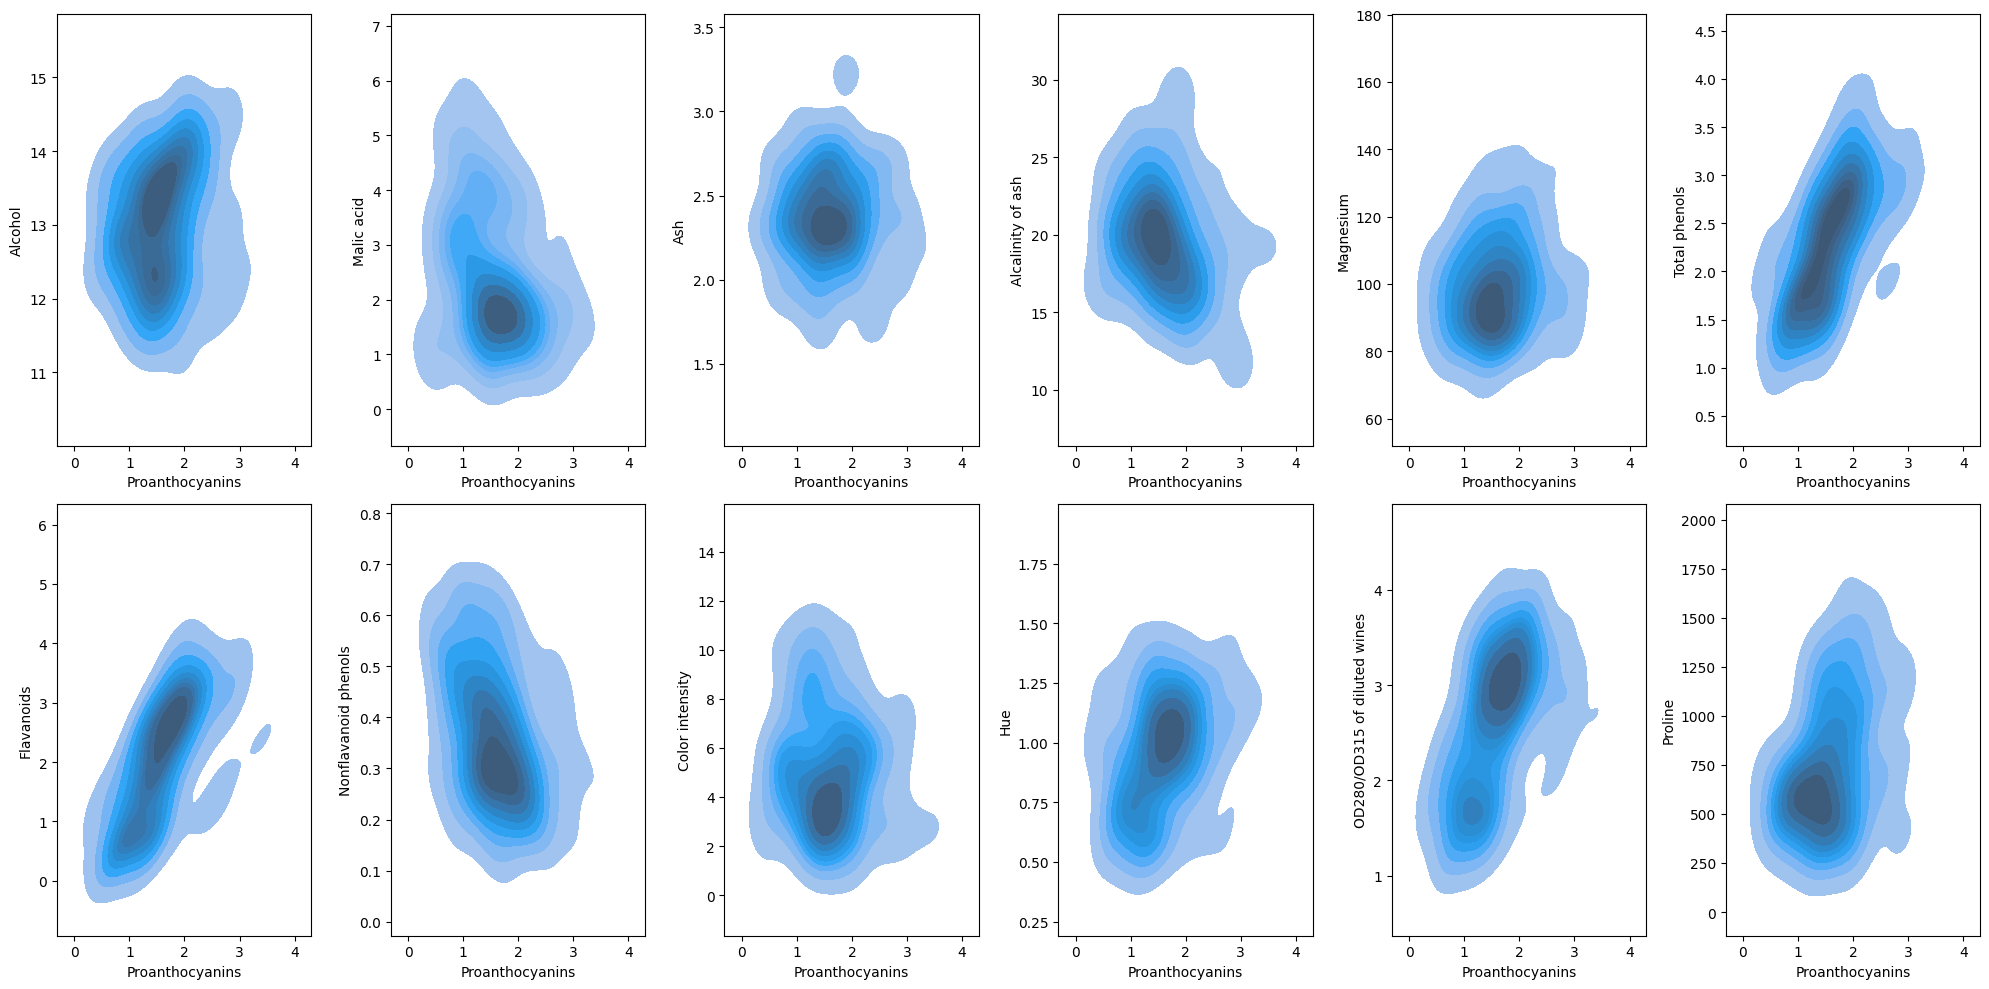

In [ ]:
#Proanthocyanins
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Proanthocyanins"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==8):
          index+=1
plt.tight_layout()
plt.show()

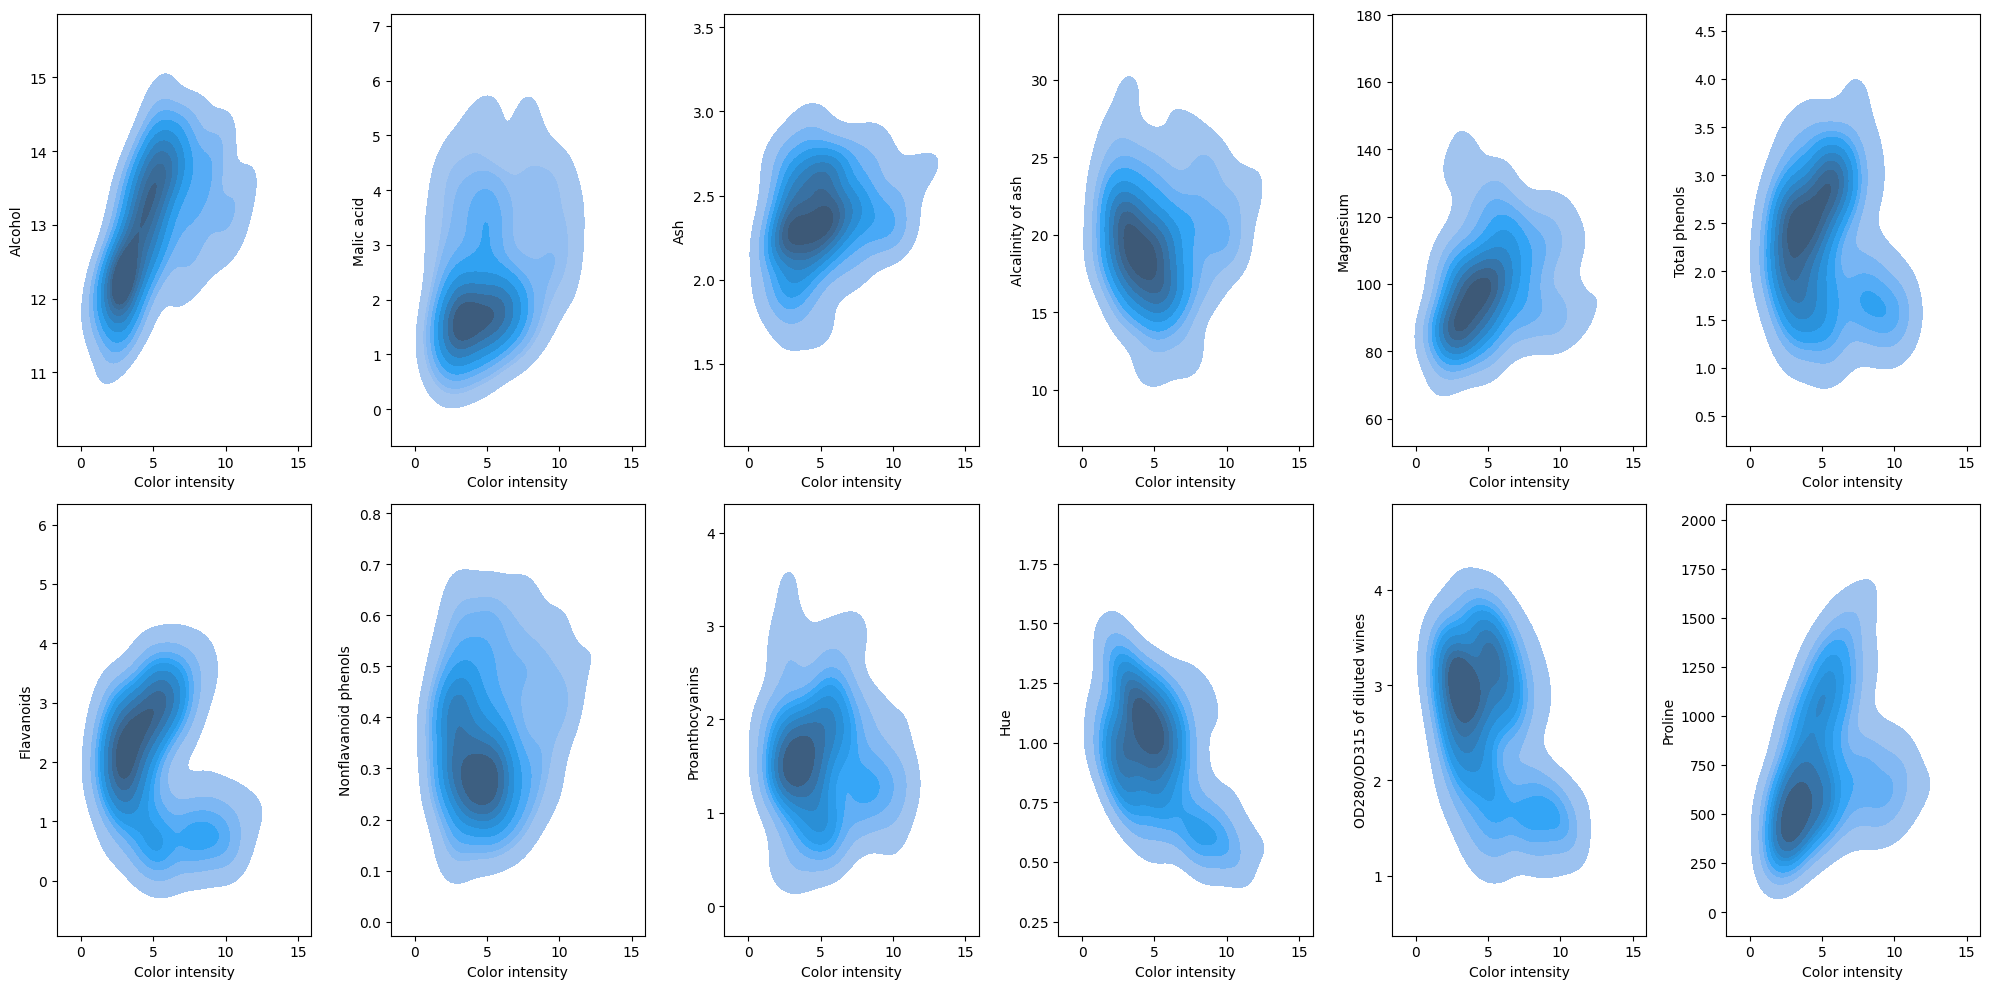

In [ ]:
#Color intensity
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Color intensity"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==9):
          index+=1
plt.tight_layout()
plt.show()

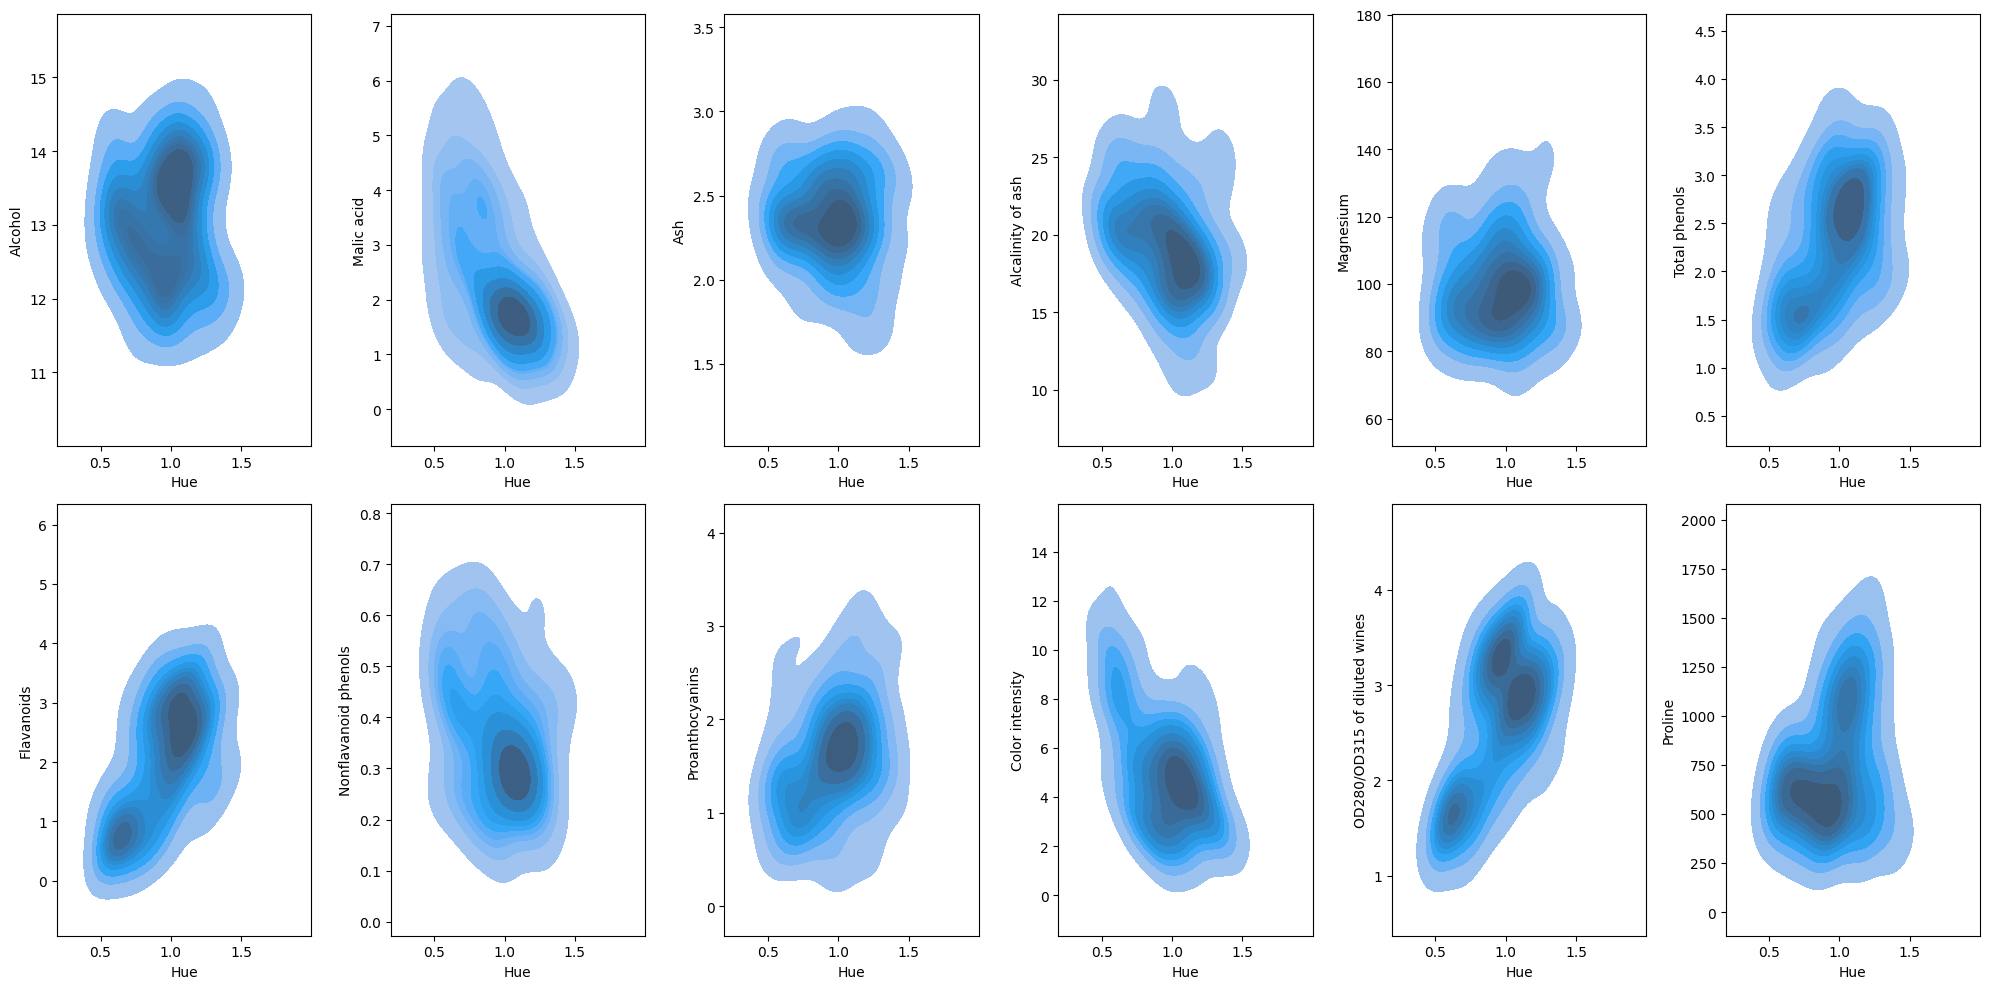

In [ ]:
#Hue
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Hue"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==10):
          index+=1
plt.tight_layout()
plt.show()

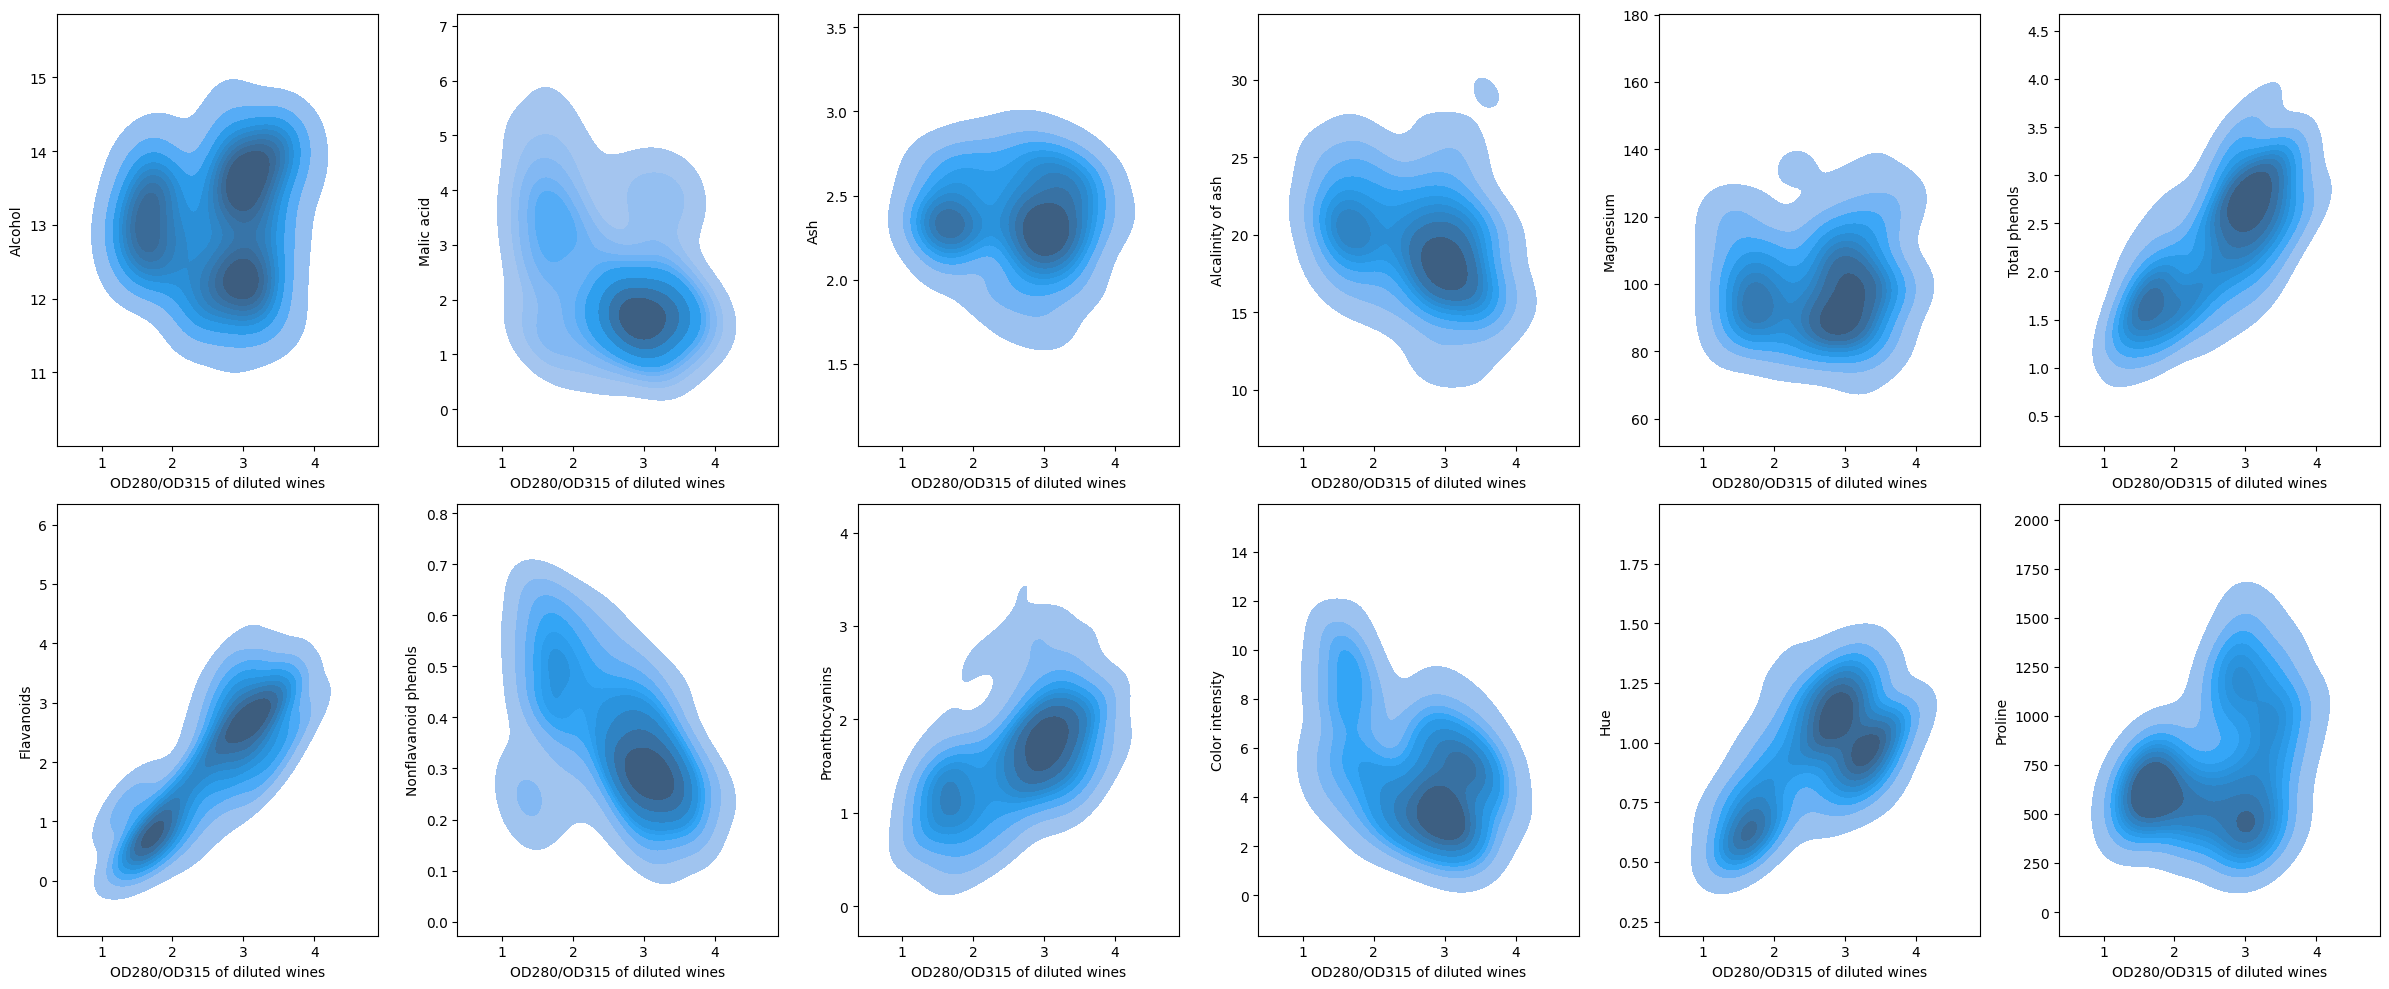

In [ ]:
#diluted wines
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(24,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["OD280/OD315 of diluted wines"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==11):
          index+=1
plt.tight_layout()
plt.show()

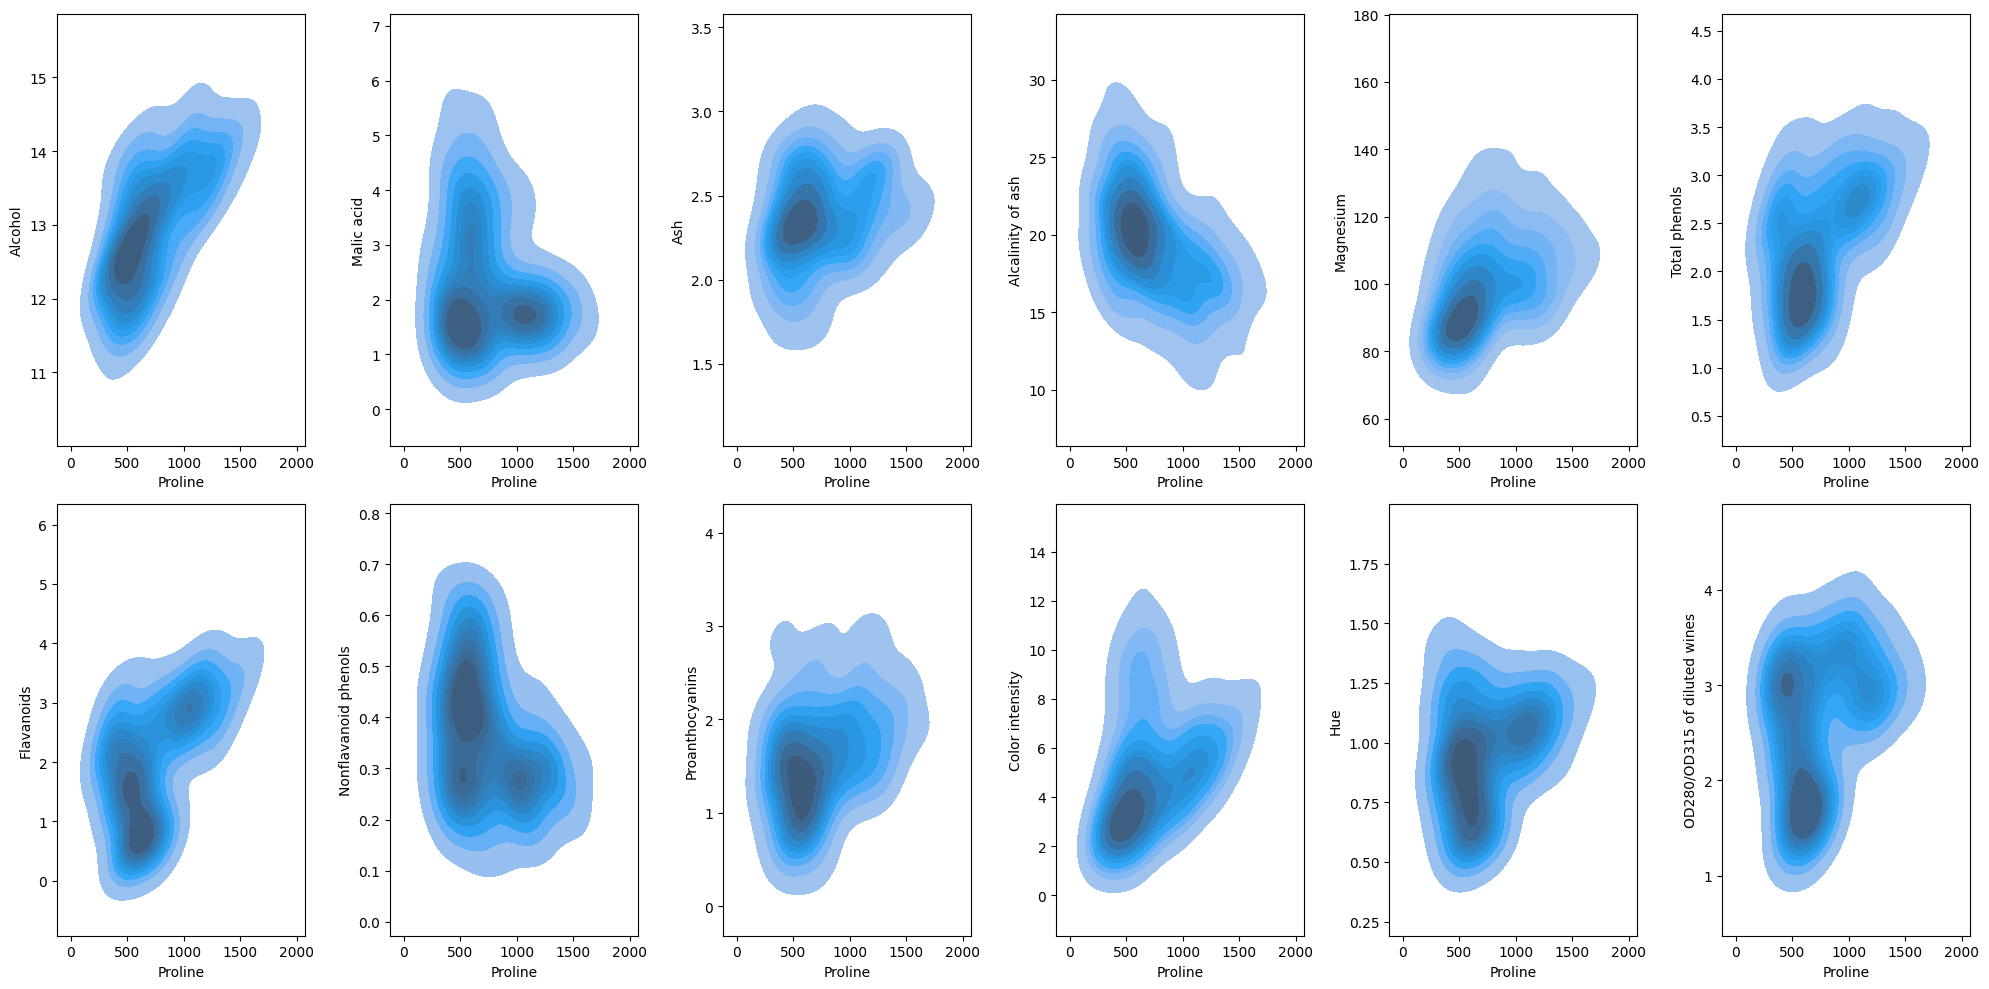

In [ ]:
#Proline
rows=2
cols=6
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(x=data["Proline"],y=data[col[index]],ax=ax[i][j],fill=True)
        index=index+1
        if(index==12):
          index+=1
plt.tight_layout()
plt.show()

#####From the bivariate Kdeplots it can be said that there might be two or at max 3 clusters

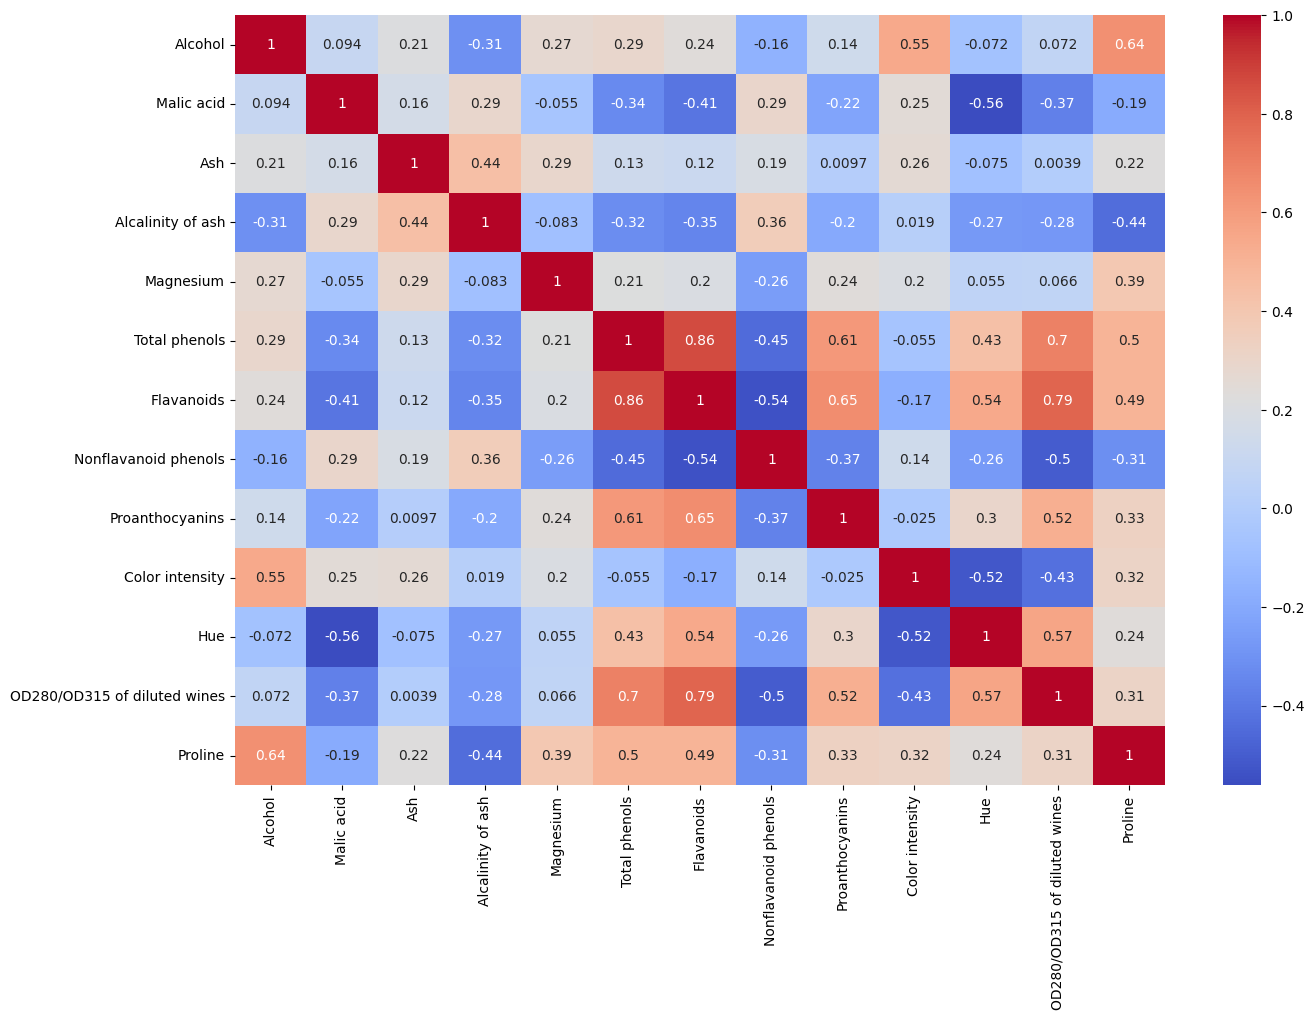

In [ ]:
plt.figure(figsize=(15,10))
correlation = data.corr()
sns.heatmap(correlation , annot = True , cmap = 'coolwarm' , xticklabels= True, yticklabels =True)
plt.show()

###There seems to be a high correlation between Flavanoids and total phenols, and Flavanoids and OD280/OD315 of diluted wines

###Feature Scaling

In [ ]:
scaler=StandardScaler(with_mean=True,with_std=True)
scaler.fit(data)
scaled_data=scaler.transform(data)

In [ ]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
pip install pca

In [ ]:
from pca import pca

[10-08-2025 06:51:36] [pca.pca] [INFO] Column labels are auto-completed.
[10-08-2025 06:51:36] [pca.pca] [INFO] Row labels are auto-completed.
[10-08-2025 06:51:36] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 13 columns of the input data.
[10-08-2025 06:51:36] [pca.pca] [INFO] Fit using PCA.
[10-08-2025 06:51:36] [pca.pca] [INFO] Compute loadings and PCs.
[10-08-2025 06:51:36] [pca.pca] [INFO] Compute explained variance.
[10-08-2025 06:51:36] [pca.pca] [INFO] Number of components is 10 that covers 95.00% explained variance.
[10-08-2025 06:51:36] [pca.pca] [INFO] The PCA reduction is performed on the 13 columns of the input dataframe.
[10-08-2025 06:51:36] [pca.pca] [INFO] Fit using PCA.
[10-08-2025 06:51:36] [pca.pca] [INFO] Compute loadings and PCs.
[10-08-2025 06:51:36] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[10-08-2025 06:51:36] [pca.pca] [INFO] Multiple test correction applied for Hot

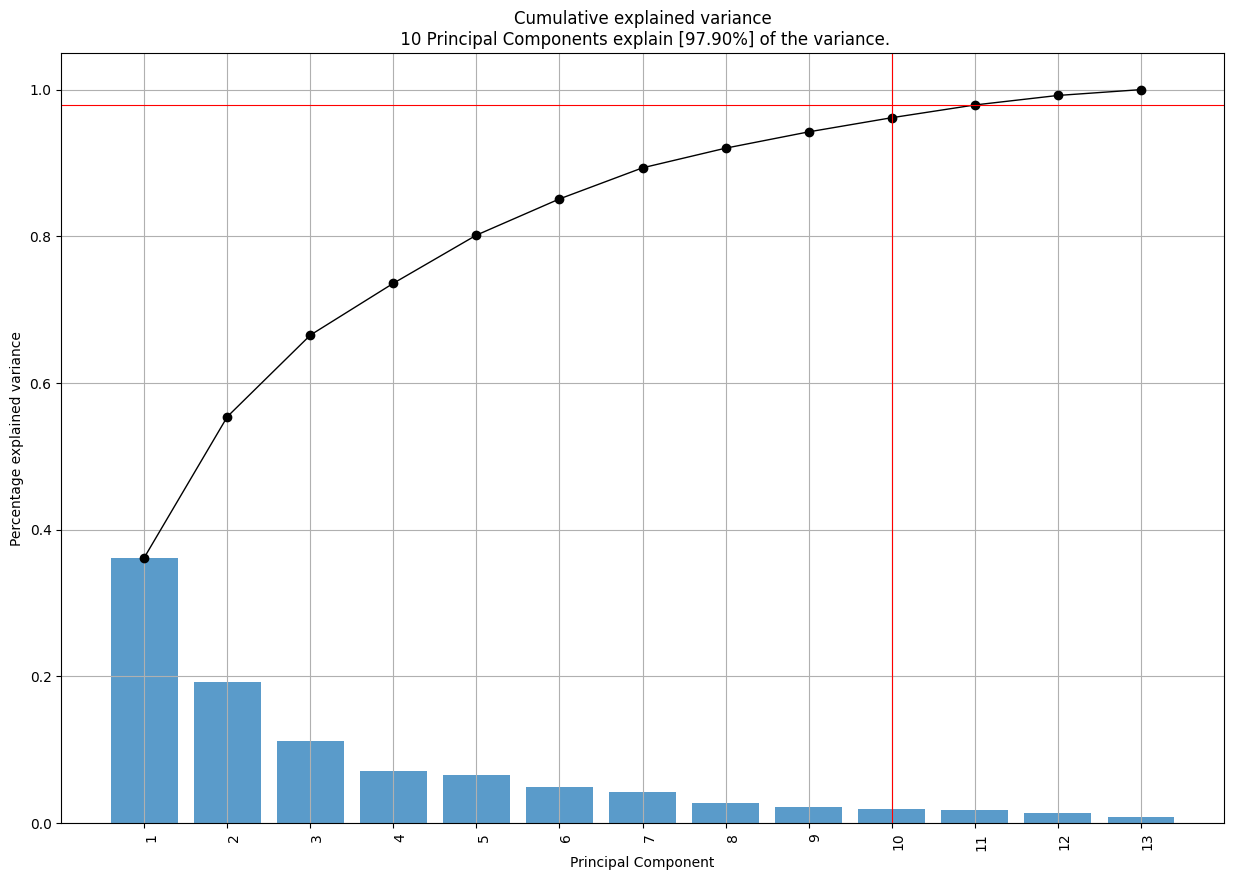

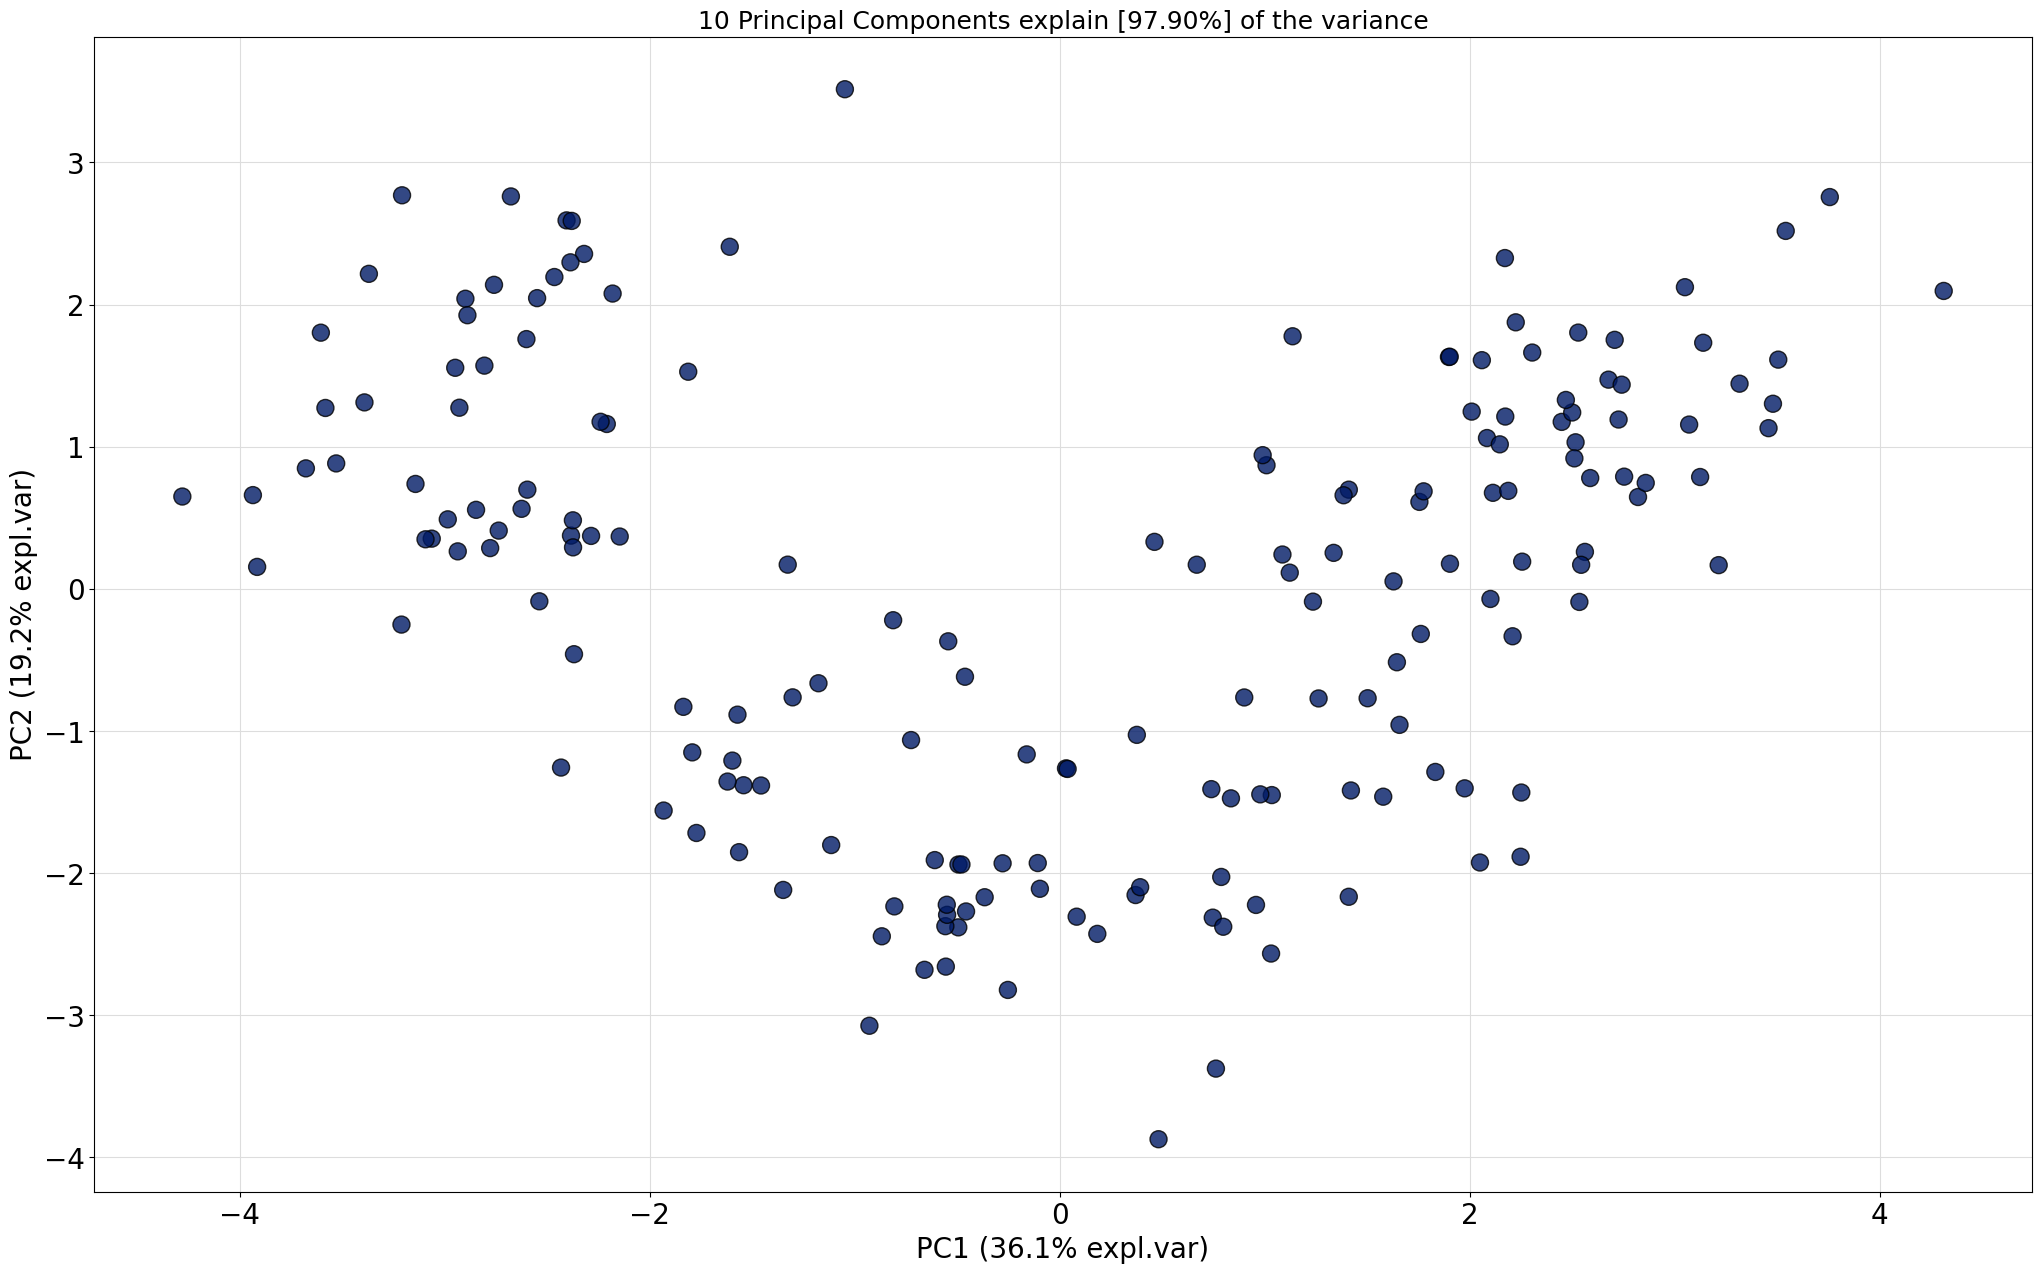

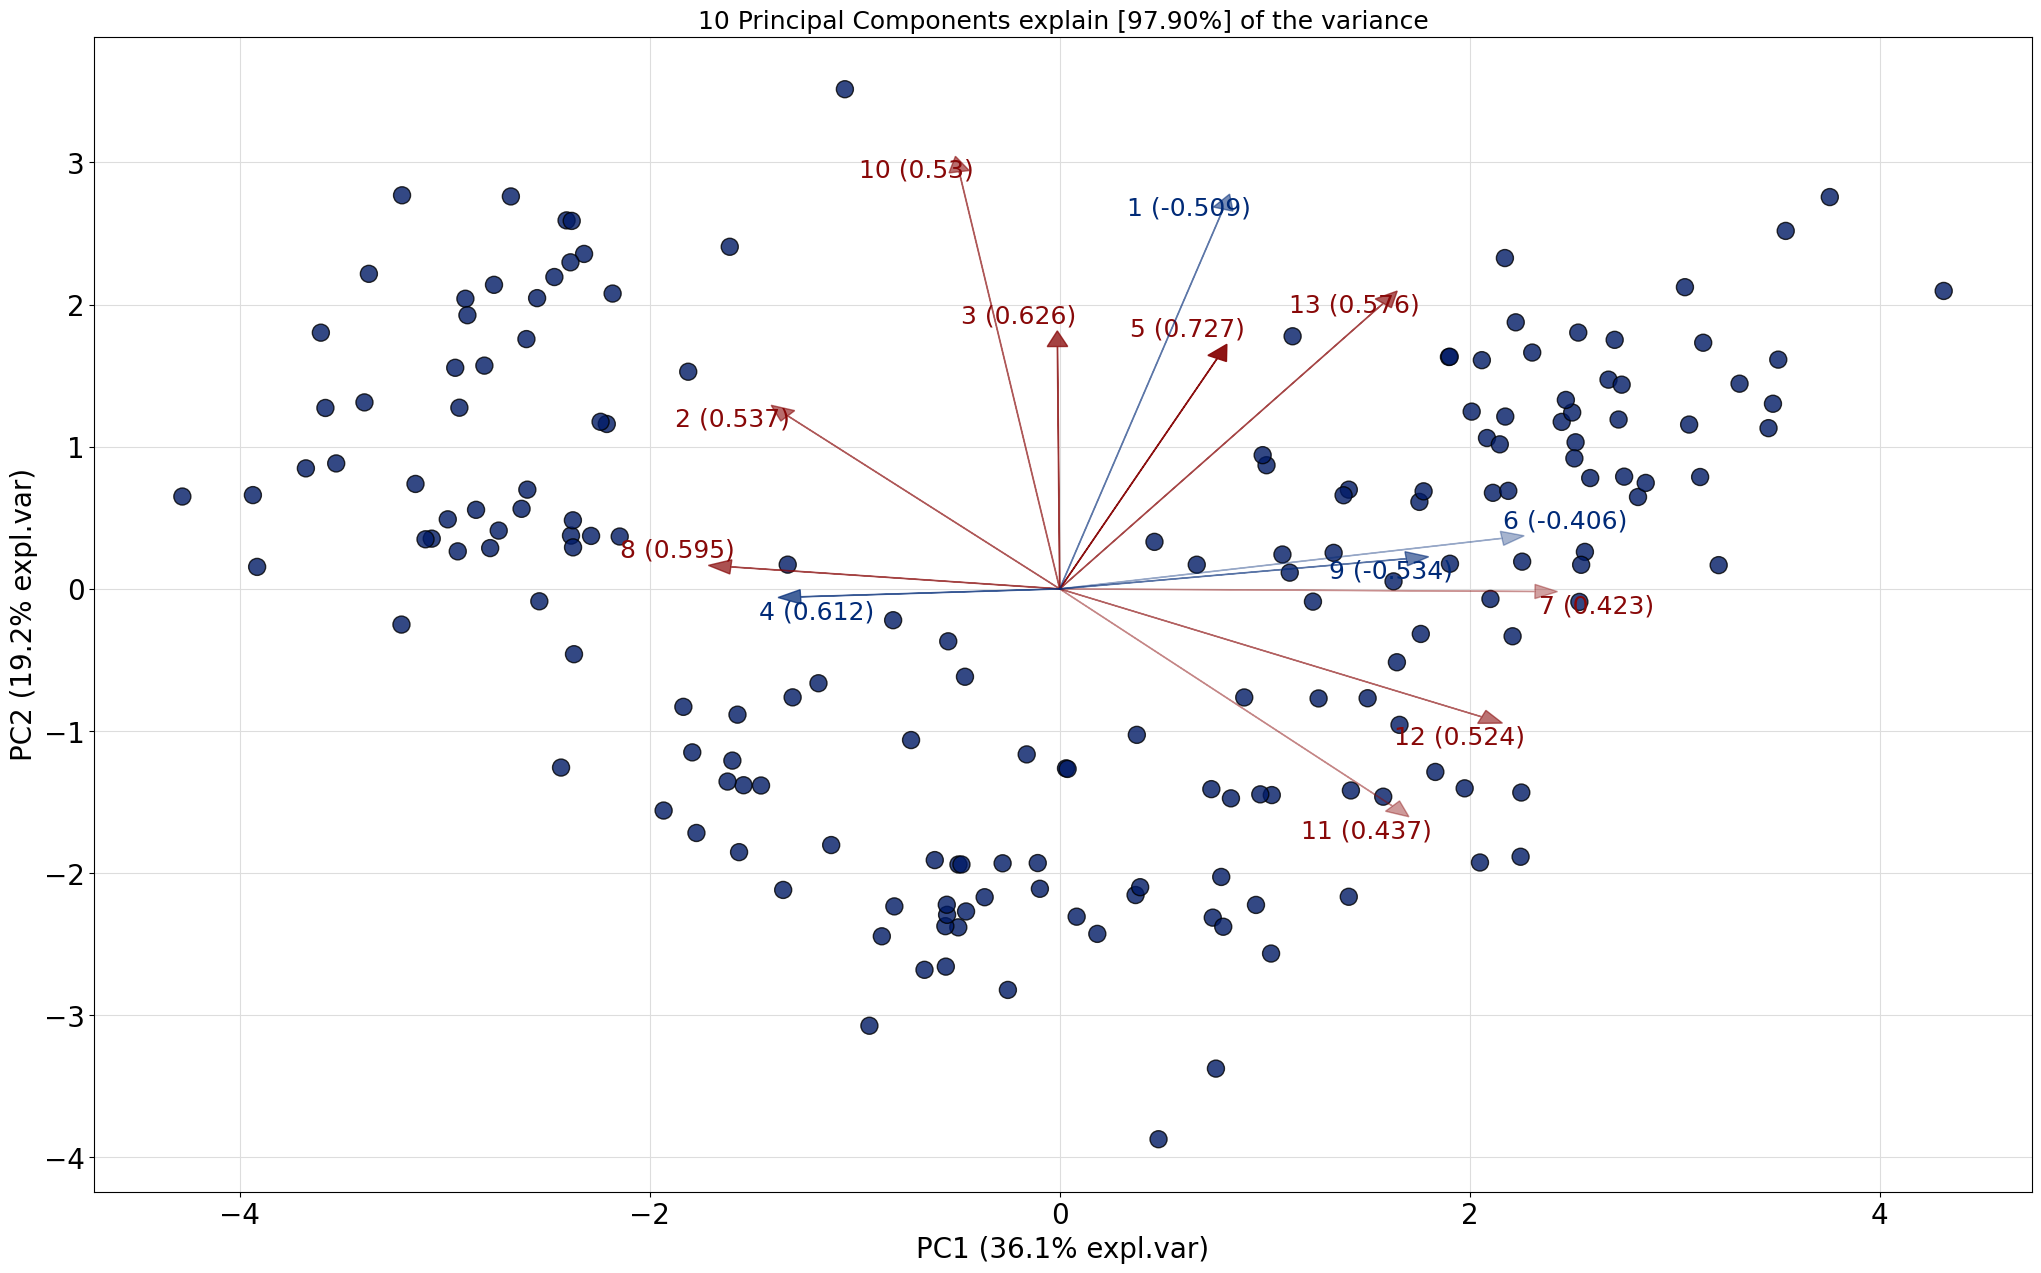

In [ ]:
#initialize to reduce the data upto the number of components that explains 95% of the variance
model = pca(n_components = 0.95)

# Fit transform
results = model.fit_transform(scaled_data)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=13, cmap='copper')


1.We observe that there is an elbow at 3.The first few PCs capture most of the variance, with the first PC alone explaining 36%. Using the first 10 PCs retains 97.9% of the dataset’s information, enabling dimensionality reduction with minimal loss.

2.The PCA biplot reveals three distinct feature groupings, indicating strong correlations within each group:(Hue, OD280/OD315, Flavanoids, Proanthocyanins, and Total phenols),(Alcohol, Ash, Magnesium, Color intensity, and Proline) and (Malic acid, Alcalinity of ash, and Nonflavanoid phenols.)

In [ ]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)

In [ ]:
pcadf=pd.DataFrame(x_pca,columns=["PC1","PC2","PC3"])
pcadf.head()

PC1       PC2       PC3
0  3.316751  1.443463 -0.165739
1  2.209465 -0.333393 -2.026457
2  2.516740  1.031151  0.982819
3  3.757066  2.756372 -0.176192
4  1.008908  0.869831  2.026688

In [ ]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631]


1.PC1 (first principal component) captures 36.20% of the total variance in the dataset.

2.PC2 (second principal component) captures 19.21%.

3.PC3 (third principal component) captures 11.12%.

Together, these three components retain about 66.53% of the dataset’s total variability.

#K Means Clustering
K-Means clustering is a popular partitioning algorithm that groups data into k clusters by minimizing the within-cluster sum of squared distances. It iteratively assigns each point to the nearest cluster centroid and then recalculates centroids until convergence. K-Means is efficient and works well for spherical clusters but is sensitive to outliers and requires the number of clusters to be specified in advance.

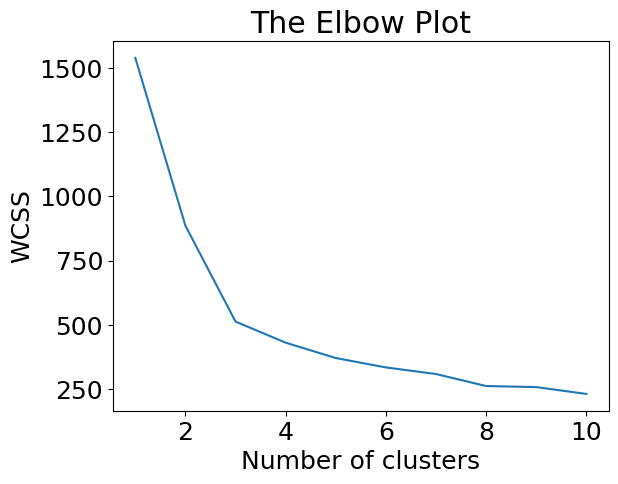

In [ ]:
#elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(pcadf)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

####The elbow method was applied to determine the optimal number of clusters for the wine dataset. The WCSS curve shows a sharp decline from k=1 to k=3, after which the rate of decrease flattens, indicating that k=3 is the optimal number of clusters.

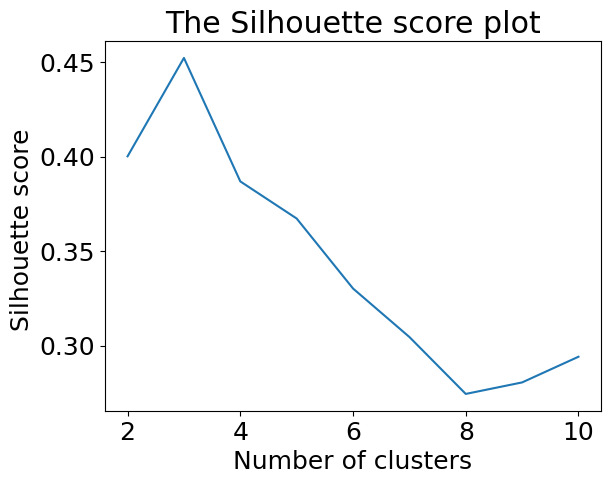

In [ ]:
score=[]
for i in range(2,11):
  km=KMeans(i)
  km.fit_predict(pcadf)
  score.append(silhouette_score(pcadf, km.labels_, metric='euclidean'))
number_clusters = range(2,11)
plt.plot(number_clusters,score)
plt.title('The Silhouette score plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score ')
plt.show()

####We observe the highest Silhouette score is for k=3.Hence we select k=3 for our KMeans clustering algorithm

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(pcadf)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
kmeans.inertia_

513.0564645910767

The total sum of squared distances from all points to their assigned cluster centers,across all three clusters in our run.

In [ ]:
kmeans.n_iter_

6

K means updated the centroids 6 times before it decided the clusters had stabilized.

In [ ]:
kmeans.cluster_centers_

array([[-3.69566084e-02, -1.77223945e+00,  1.86138728e-01],
       [-2.72003575e+00,  1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00,  9.32054027e-01,  1.52803156e-03]])

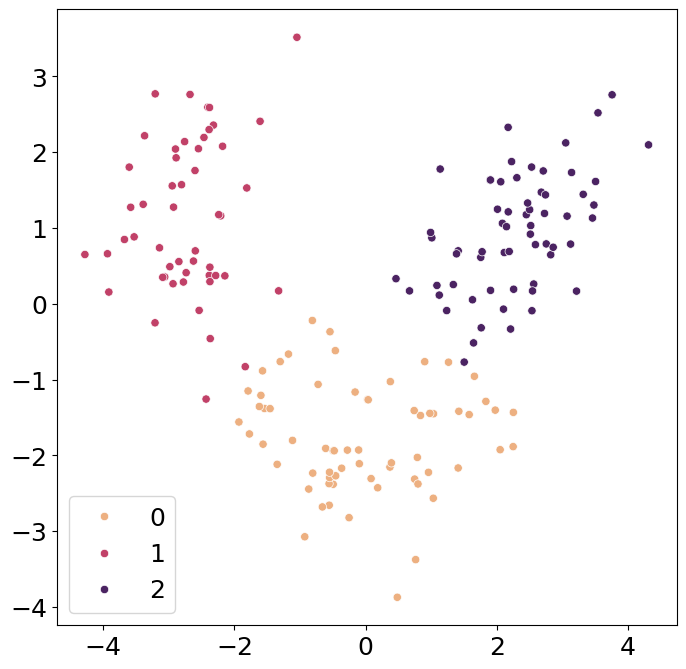

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = x_pca[:,0],y = x_pca[:,1],hue=kmeans.labels_,palette='flare')
plt.show()

####The data has been clustered into 3 clusters labelled as 0,1,2 using K-Means clustering algorithm

#K Medoid Clustering
K-Medoids clustering is similar to K-Means but uses actual data points called medoids as cluster centers, making it more robust to noise and outliers. It minimizes the sum of dissimilarities between points and their medoids. Unlike K-Means, which uses means, K-Medoids is based on pairwise distances and can use arbitrary distance metrics, offering more flexibility for non-Euclidean data.

In [ ]:
!pip install pyclustering

from pyclustering.cluster.kmedoids import kmedoids

In [ ]:
from pyclustering.utils import calculate_distance_matrix

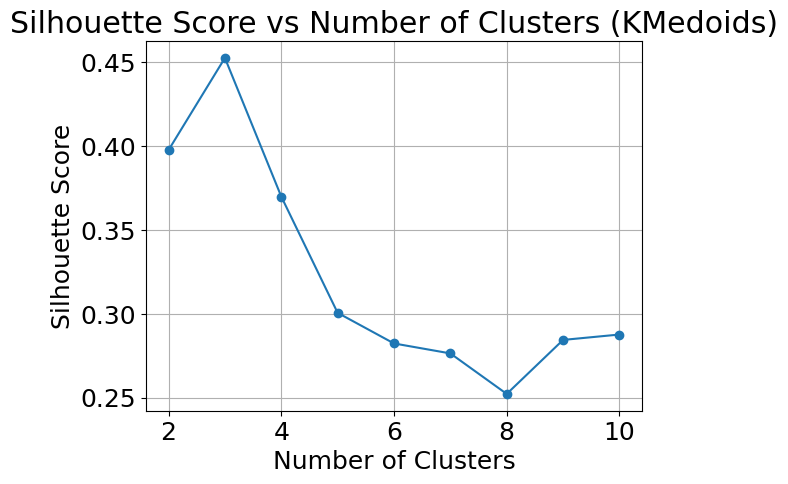

In [ ]:
data = np.array(pcadf)
distance_matrix = calculate_distance_matrix(data)
scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    # Initialize medoids indices randomly — choose first k points as medoids for simplicity
    initial_medoids = list(range(k))

    # Run KMedoids clustering
    kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    clusters = kmedoids_instance.get_clusters()

    # Create a labels array from clusters for silhouette_score calculation
    labels = np.empty(len(data), dtype=int)
    for cluster_id, cluster_points in enumerate(clusters):
        for point_idx in cluster_points:
            labels[point_idx] = cluster_id

    # Calculate silhouette score using original data and labels
    score = silhouette_score(data, labels)
    scores.append(score)

# Plot silhouette scores
plt.plot(cluster_range, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (KMedoids)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

The optimal number of clusters is 3 as it gives the highest silhouette score.Adding more clusters reduces clustering quality.

In [ ]:
# Choose number of clusters (e.g., best from silhouette plot or fixed 3)
best_k = 3

# Initial medoids indices for best_k clusters
initial_medoids = list(range(best_k))

# Run KMedoids clustering for best_k
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
cluster_centers = data[medoids]

# Create labels array from clusters
labels = np.empty(len(data), dtype=int)
for cluster_id, cluster_points in enumerate(clusters):
    for idx in cluster_points:
        labels[idx] = cluster_id
print("Cluster labels:\n", labels)
print("\nCluster centers (medoids):\n", cluster_centers)


Cluster labels:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Cluster centers (medoids):
 [[-2.80706372  1.57053379 -0.47252793]
 [-0.27870275 -1.93056809  0.07867055]
 [ 2.58809543  0.7796163  -0.11847747]]


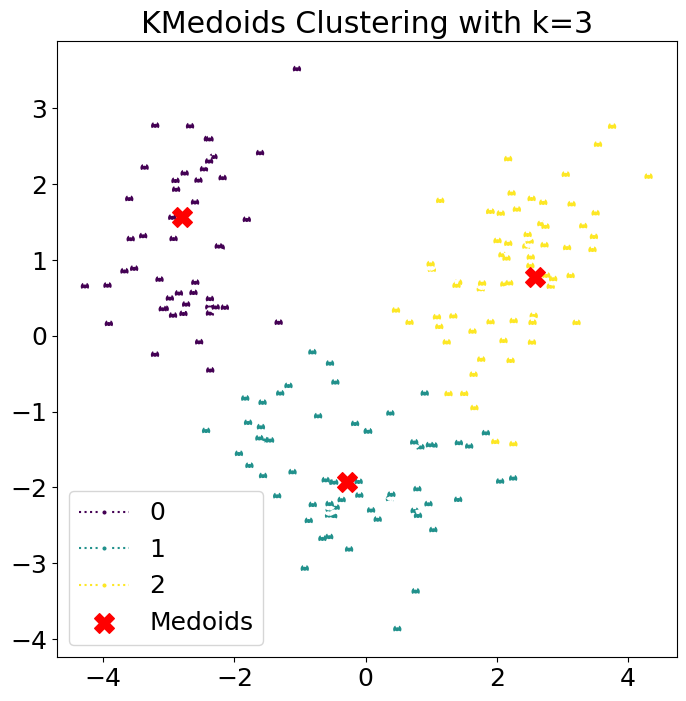

In [ ]:
# Plotting clusters using seaborn
plt.figure(figsize=(8, 8))

kwargs = {
    'edgecolor': "w",
    'linewidth': 3,
    'linestyle': ':',
}

sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=labels, palette='viridis', **kwargs)

# Mark medoids
plt.scatter(data[medoids, 0], data[medoids, 1], c='red', s=200, marker='X', label='Medoids')

plt.title(f'KMedoids Clustering with k={best_k}')
plt.legend()
plt.show()


The dataset forms three distinct clusters with medoids marked in red.
These medoids acts as the most central points,representing each cluster's center.

##Hierarchical Clustering
Hierarchical Clustering is a cluster analysis method which produces a tree-based representation of data. Objects in the dendrogram are linked together based on their similarity. Hierarchical clustering can be of two types: Agglomerative and Divisive. In Agglomerative HCA, it is a bottom up approach. Here first we consider that each observation is an independent cluster. Hence with n observations, we have n clusters at the beginning.Then we cluster the closest two clusters together to merge them into a single cluster. Hence we now have n-1 clusters. We keep on doing this until we have one single cluster containing all the datapoints. Hence here the distance between two clusters is important. There are various ways to calculate the distance between two clusters, and these ways decide the rule for clustering. These measures are called Linkage methods.The popular linkage methods are:

1.Maximum or complete linkage: The distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce more compact clusters.

2.Minimum or single linkage: The distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce long, “loose” clusters.

3.Mean or average linkage: The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.

4.Centroid linkage: The distance between two clusters is defined as the distance between the centroid for cluster 1 (a mean vector of length p variables) and the centroid for cluster 2.

5.Ward’s minimum variance method: It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.

We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.

1.Determine the largest vertical distance that doesn’t intersect any of the other clusters.

2.Draw a horizontal line at both extremities.

3.The optimal number of clusters is equal to the number of vertical lines going through the horizontal line

###Agglomerative Hierarchical Clustering

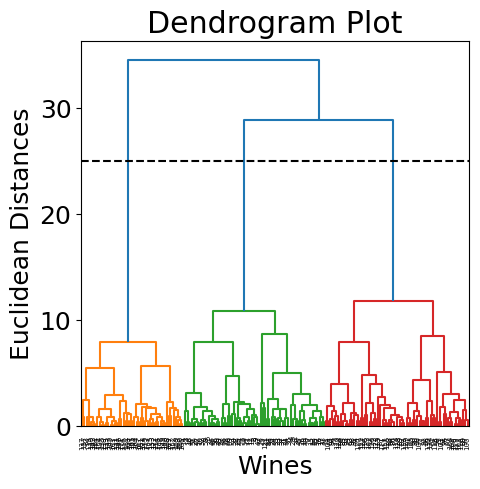

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(5,5))
dendro = shc.dendrogram(shc.linkage(pcadf, method="ward"))
plt.axhline(y=25,color="black",linestyle="--")
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Wines")
plt.show()

We have the longest vertical line in the range 12-28. So we draw a horizontal line at y=25 to obtain the number of clusters. Since there are 3 cuts to the horizontal line, the number of clusters is 3

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
linkage = ['complete', 'average', 'single']
metrics = ["euclidean", "manhattan", "cosine"]
s_scores = []
max_score = -1

for metric in metrics:
    for link in linkage:
        agg = AgglomerativeClustering(n_clusters=3, metric=metric, linkage=link)
        agg.fit(pcadf)
        score = silhouette_score(pcadf, agg.labels_)
        s_scores.append(score)
        if score > max_score:
            max_score = score
            best_metric = metric
            best_linkage = link

print("Best metric:", best_metric)
print("Best linkage:", best_linkage)
print("Best silhouette score:", max_score)


Best metric: cosine
Best linkage: average
Best silhouette score: 0.42258071461433794


In [ ]:
cos_single = silhouette_score(pcadf, AgglomerativeClustering(n_clusters=3, metric="cosine", linkage="single").fit(pcadf).labels_)
cos_single

0.0096940791487025

In [ ]:
euclidean_ward=silhouette_score(pcadf,AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward").fit(pcadf).labels_ )
euclidean_ward

0.4459492198062967

Clearly the silhouette score is maximum for affinity="euclidean" and linkage="ward"

In [ ]:
agg = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward',)
agg.fit(pcadf)
agg.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
#number of observations in each cluster
from collections import Counter
Counter(agg.labels_)

Counter({np.int64(2): 65, np.int64(0): 66, np.int64(1): 47})

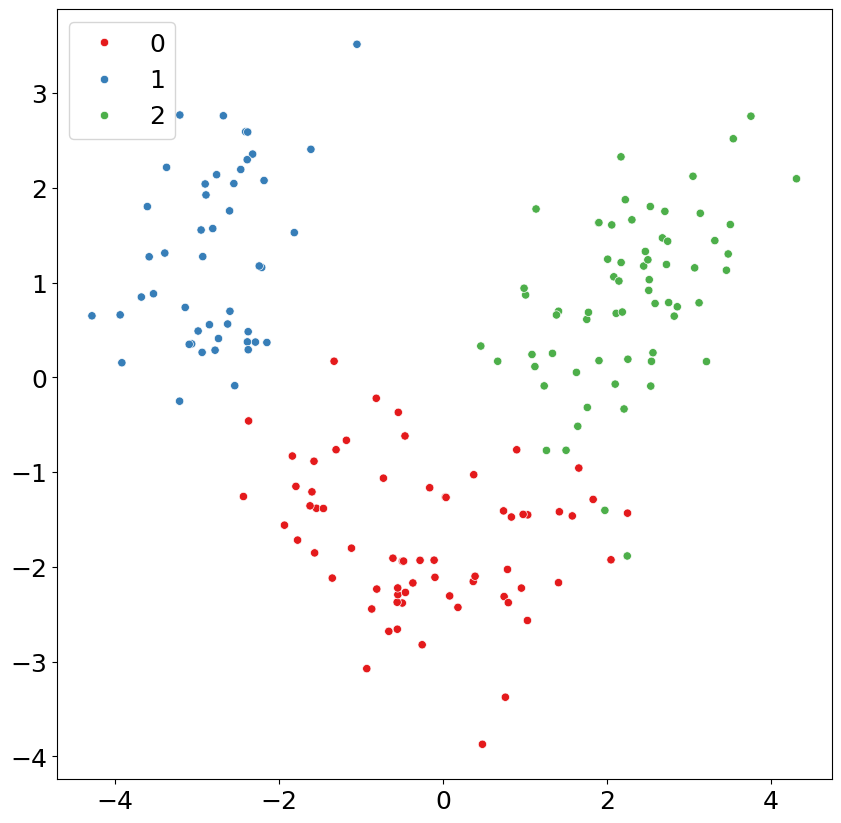

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=agg.labels_,palette='Set1')
plt.show()

The data has been clustered into 3 clusters labelled as 0,1,2 using Agglomerative Hierarchical clustering algorithm

#DBSCAN(Density Based Spatial Clustering of Applications with Noise)

It is a density-based clustering algorithm that groups together points closely packed together (points with many nearby neighbors) and marks points in low-density regions as outliers or noise. Unlike K-Means or hierarchical clustering, DBSCAN does not require specifying the number of clusters beforehand and can find arbitrarily shaped clusters. It relies on two parameters: eps (the neighborhood radius) and min_samples (minimum number of points in a neighborhood to form a cluster). DBSCAN is effective at discovering clusters with varying shapes and handling noise in the data.



In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
data = np.array(pcadf)
params = {'eps':[0.1,0.3,0.5,0.7],'min_samples':[3,5,7]}
for eps in params['eps']:
  for min_s in params['min_samples']:
    dbscan = DBSCAN(eps=eps, min_samples=min_s, metric='euclidean')
    dbscan.fit(data)

# Extract labels (-1 means noise)
labels_d = dbscan.labels_
print("Cluster Labels: \n" , labels_d)

# Calculate silhouette score only if there are at least 2 clusters (ignoring noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if num_clusters > 1:
    score = silhouette_score(data[labels != -1], labels[labels != -1])
    print(f'Silhouette Score (excluding noise): {score:.4f}')
else:
    print('Silhouette score cannot be computed (only one cluster found).')

Cluster Labels: 
 [ 0 -1 -1 -1 -1  0  0  0 -1  0  0 -1  0 -1 -1  0  0  0 -1  0  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  2 -1  2 -1  2 -1 -1  2 -1 -1  2 -1  2
 -1  2 -1 -1  3  3 -1  3 -1  3  2 -1  3 -1 -1 -1 -1 -1 -1  2  3 -1 -1 -1
 -1 -1 -1 -1  3  3  3  3  3 -1]
Silhouette Score (excluding noise): 0.7200


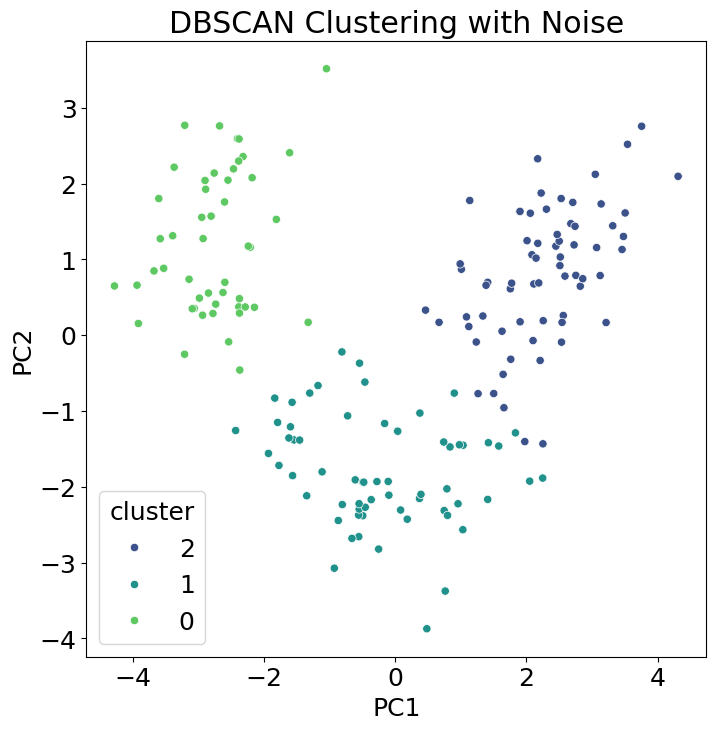

In [ ]:
# Create a DataFrame for seaborn plotting
df = pd.DataFrame({
    'PC1': data[:, 0],
    'PC2': data[:, 1],
    'cluster': labels
})

# Convert cluster labels to string so noise (-1) is shown clearly
df['cluster'] = df['cluster'].astype(str)
df.loc[df['cluster'] == '-1', 'cluster'] = 'noise'

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis', edgecolor='w', linewidth=0.5)
plt.title('DBSCAN Clustering with Noise')
plt.show()


#Model Comparison

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
row_names=['Algorithm','Silhouette score','DB index']
alg=["K-Means","K-medoids","Hierarchical","DBSCAN"]
comp=[kmeans.labels_,labels,agg.labels_,labels_d]
d={}
for i in range(0,4):
    d[i]=[alg[i],silhouette_score(pcadf,comp[i]),davies_bouldin_score(pcadf,comp[i])]
d
table=pd.DataFrame(d,index=row_names)
table

0          1             2         3
Algorithm          K-Means  K-medoids  Hierarchical    DBSCAN
Silhouette score    0.4538    0.45265      0.445949 -0.080334
DB index          0.838856   0.842998      0.851522   1.27655

#####The results show that K-Means has the highest silhouette score (0.4538) and the lowest DB index (0.838856), indicating it performs the best among the four algorithms for this dataset. DBSCAN performs poorly with a negative silhouette score (-0.080334) and the highest DB index (1.27655), suggesting it may not be suitable for this data. K-medoids and Hierarchical clustering show similar, slightly worse performance compared to K-Means.

We are given the dataset with the class classifications. Hence we can use it to calculate the accuracy of each algorithm. Note that this is an unsupervised problem. We have got the actual data with the class labels which is an added advantage

In [ ]:
test_data = pd.read_csv('wine_dataset_class.csv')

In [ ]:
test_data.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [ ]:
Counter(test_data["Class"])

Counter({1: 59, 2: 71, 3: 48})

From the test data we observe that the first 59 observations belong to one class,next 71 observations belong to another class and the last 48 observations belong to yet another class

We define a function to calculate the misclassification for every algorithm and hence calculate the accuracy of each algorithm

In [ ]:
def misclassify(a,b,alg):
    count_0=count_1=count_2=0
    tot=0
    tot=b-a
    maxm=0
    mis=0
    for i in range(a,b):
      if(alg[i]==0):
        count_0 +=1
      if(alg[i]==1):
        count_1 +=1
      if(alg[i]==2):
        count_2 +=1
    maxm=max(count_0,count_1,count_2)
    mis=tot-maxm
    return mis

In [ ]:

accuracy=[0]*5
k=0
comp=[kmeans.labels_,labels,agg.labels_,labels_d]
for i in comp:
  corr=[0]*3
  corr[0]=misclassify(0,59,i)
  corr[1]=misclassify(59,130,i)
  corr[2]=misclassify(130,178,i)
  accuracy[k]=(178-(sum(corr)))/178
  k=k+1
accuracy


[0.9662921348314607,
 0.9550561797752809,
 0.949438202247191,
 0.2696629213483146,
 0]

In [ ]:
row_names=['Algorithm','Accuracy']
alg=["K-Means","K-medoids","Hierarchical","DBSCAN"]
comp=[kmeans.labels_,labels,agg.labels_,labels_d]
d={}
for i in range(0,4):
    d[i]=[alg[i],accuracy[i]]
d
table=pd.DataFrame(d,index=row_names)
table

0          1             2         3
Algorithm   K-Means  K-medoids  Hierarchical    DBSCAN
Accuracy   0.966292   0.955056      0.949438  0.269663

The results clearly show K-Means is the best performer (96.6% accuracy) for this dataset, followed closely by K-medoids and Hierarchical clustering. While DBSCAN's poor performance suggests the data may not have clear density-based clusters, this insight helps focus on the most suitable algorithms.

In [ ]:
data = pd.read_csv('wine_dataset.csv')

In [134]:
newdf=data
newdf["Cluster"]=kmeans.labels_
newdf

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280/OD315 of diluted wines  Proline  Cluster  
0                            3.92     1065        2  
1                            3.40     1050        2  
2                            3.17     1185        2  
3                            3.45     1480        2  
4                            2.93      735        2  
..                            ...      ...      ...  
173                          1.74      740        1  
174                          1.56      750        1  
175                          1.56      835        1  
176                          1.62      840        1  
177                          1.60      560        1  

[178 rows x 14 columns]

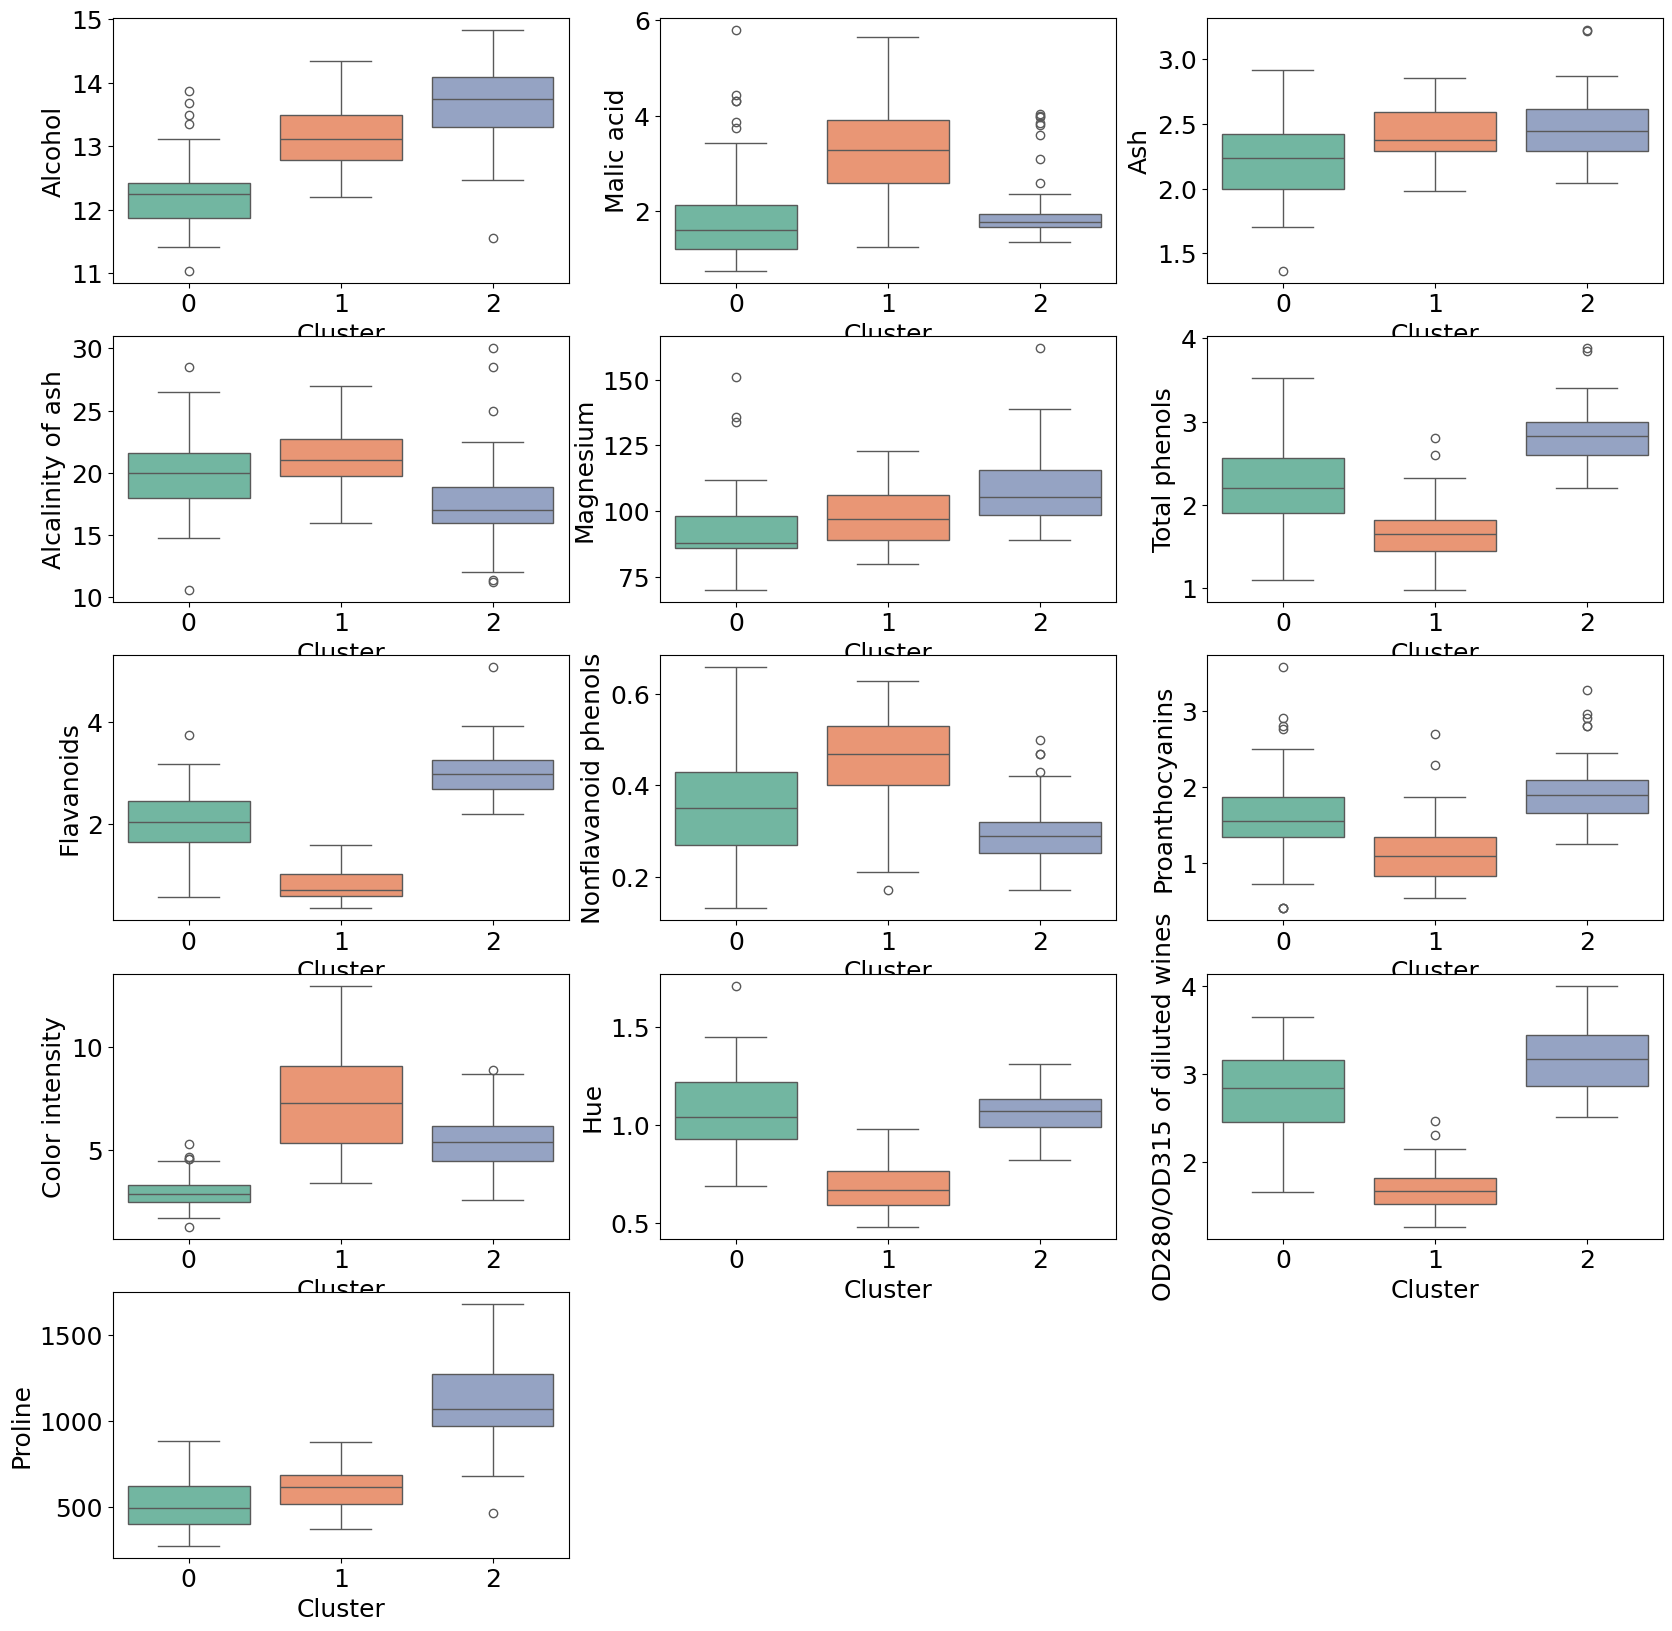

In [139]:
ax=[]
names=newdf.columns
fig=plt.figure(figsize=(20,20))
for i in range(13):
  ax.append(fig.add_subplot(5,3,(i+1)))
  sns.boxplot(x="Cluster",y=names[i],data=newdf,ax=ax[i],palette="Set2")

plt.show()

This plot shows boxplots of each feature in your dataset grouped by cluster membership. It helps visualize how the distribution of each feature varies across different clusters, highlighting differences and similarities between clusters for those features.